## Perform End to end data preprocessing and analysis on American universities dataset

In [286]:
# importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import style
style.use("ggplot")

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [287]:
university = pd.read_csv("universities_data.csv")          # importing the dataset and storing in the variable university

In [288]:
university.info()                                          # basic information regarding the dataset, including the no.of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [289]:
university.columns                              # list of columns in the dataset

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)

In [290]:
university.head()                          # the first 5 entries of the dataset

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [291]:
university.duplicated().sum()                         # checks for duplicate values

0

In [292]:
university.isnull().sum()                             # checks for null values


ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [293]:
''' Creating new dataset with 20 entries from the columns "Name","Applicants total","Admissions total" 
    and "Enrolled total" from university dataset by sorting values based on Applicants total column '''

uni_app = university[["Name","Applicants total","Admissions total","Enrolled total"]].sort_values("Applicants total",ascending=False).head(20).dropna()
uni_app

,Name,Applicants total,Admissions total,Enrolled total
84,University of California-Los Angeles,72676.0,15981.0,5620.0
81,University of California-Berkeley,61717.0,11108.0,4162.0
86,University of California-San Diego,60832.0,22812.0,4575.0
841,New York University,57845.0,15066.0,5207.0
83,University of California-Irvine,56515.0,23956.0,5077.0
87,University of California-Santa Barbara,55258.0,24556.0,4741.0
77,California State University-Long Beach,55019.0,16956.0,4276.0
863,St John's University-New York,51634.0,27449.0,2792.0
126,San Diego State University,51163.0,15970.0,4139.0
82,University of California-Davis,49820.0,22526.0,5208.0


Text(0, 0.5, 'Universities')

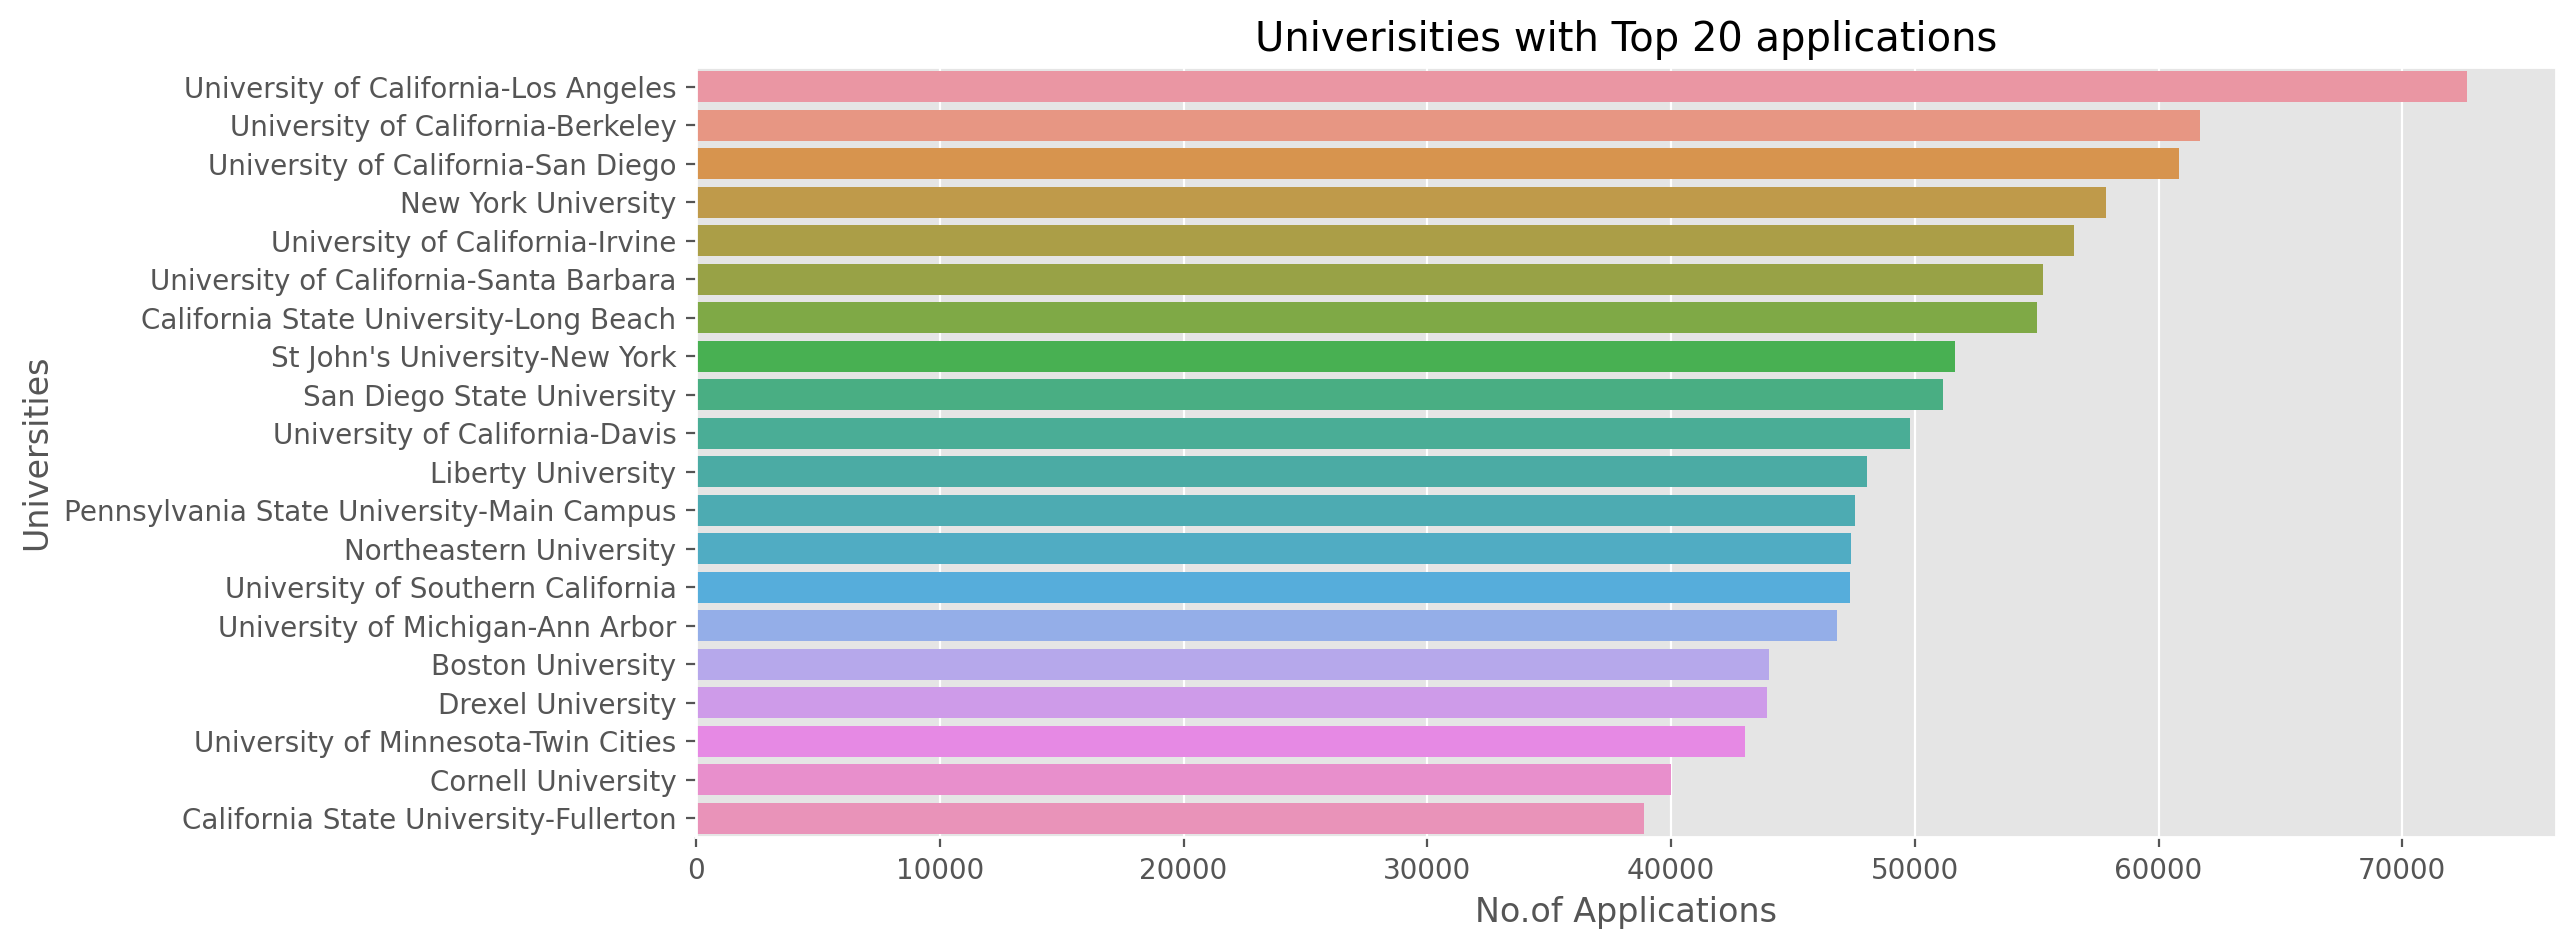

In [294]:
# displaying the universities with  Top 20 applications

plt.figure(figsize=(12,5),dpi=200)
sns.barplot("Applicants total","Name",data=uni_app)
plt.title("Univerisities with Top 20 applications")
plt.xlabel("No.of Applications")
plt.ylabel("Universities")

In [295]:
''' Creating new dataset with 20 entries from the columns "Name","Applicants total" and "Enrolled total" 
    from university dataset by sorting values based on "Enrolled total" column '''

uni_enroll = university[["Name","Applicants total","Enrolled total"]].sort_values("Enrolled total",ascending=False).head(20)
uni_enroll

,Name,Applicants total,Enrolled total
1309,Texas A & M University-College Station,31387.0,10241.0
606,Michigan State University,31479.0,8061.0
1133,Pennsylvania State University-Main Campus,47552.0,7649.0
359,Indiana University-Bloomington,37826.0,7604.0
34,University of Arizona,26329.0,7401.0
301,University of Illinois at Urbana-Champaign,33203.0,7329.0
1311,The University of Texas at Austin,38161.0,7249.0
33,Arizona State University-Tempe,21770.0,7171.0
998,Ohio State University-Main Campus,31359.0,7130.0
5,The University of Alabama,30975.0,6454.0


Text(0, 0.5, 'Universities')

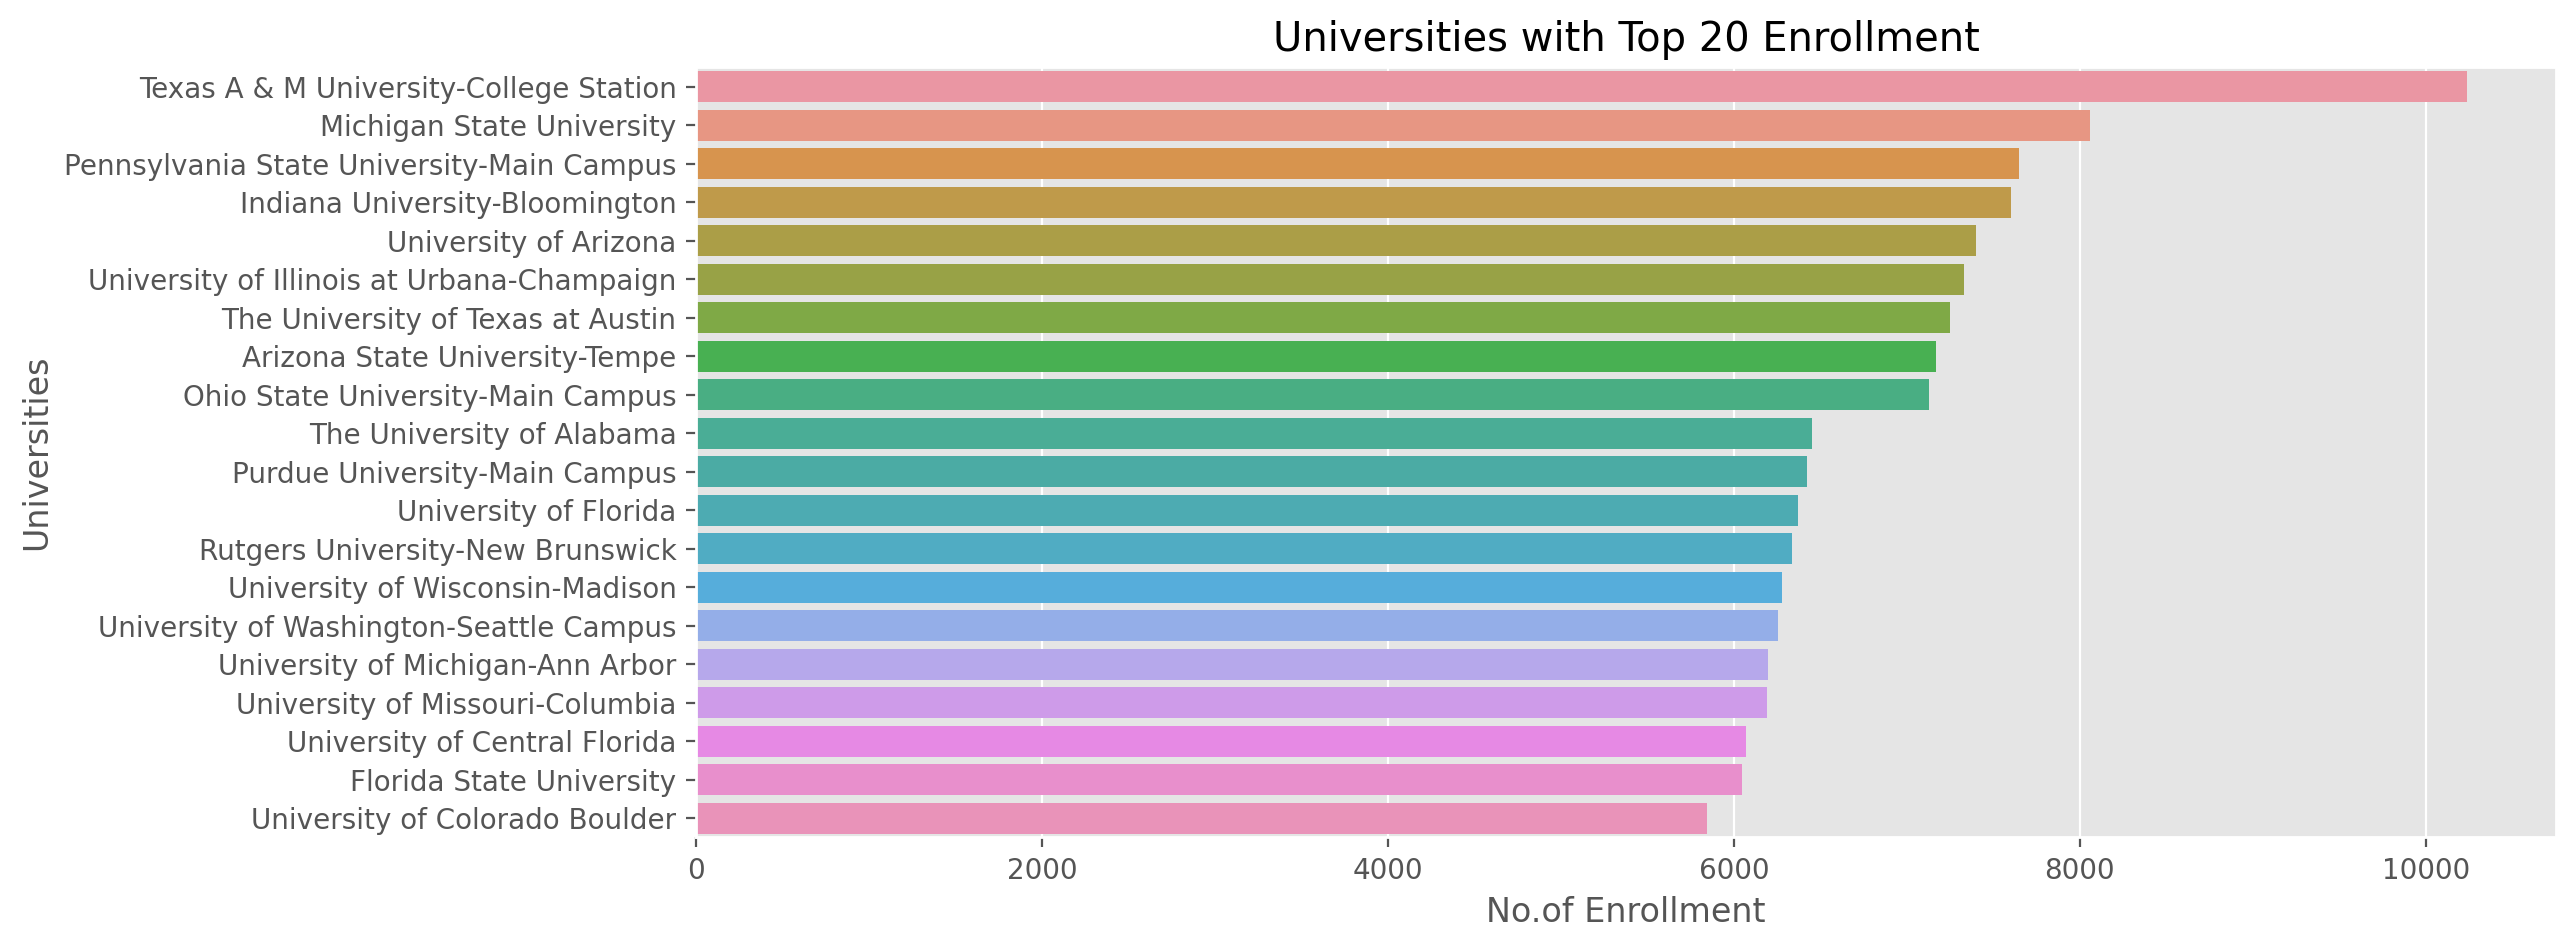

In [296]:
# displaying the universities with top 20 enrollment

plt.figure(figsize=(12,5),dpi=200)
sns.barplot("Enrolled total","Name",data=uni_enroll)
plt.title("Universities with Top 20 Enrollment")
plt.xlabel("No.of Enrollment")
plt.ylabel("Universities")

## ----------------------------------------------------------------------------------------------------------------------------------
### 1.	Do universities with a high number of applications are the preferred ones by students? 

In [297]:
''' Creating new dataset with the columns "Name","Applicants total and "Enrolled total" from university dataset '''

uni = university[["Name","Applicants total","Enrolled total"]]

In [298]:
uni["enroll percent"]=(uni["Enrolled total"]/uni["Applicants total"])*100 # creating new column having the enrollment percentage value

In [299]:
uni.sort_values("Applicants total",ascending=False).head(20)

,Name,Applicants total,Enrolled total,enroll percent
84,University of California-Los Angeles,72676.0,5620.0,7.732952
81,University of California-Berkeley,61717.0,4162.0,6.743685
86,University of California-San Diego,60832.0,4575.0,7.520713
841,New York University,57845.0,5207.0,9.001642
83,University of California-Irvine,56515.0,5077.0,8.983456
87,University of California-Santa Barbara,55258.0,4741.0,8.579753
77,California State University-Long Beach,55019.0,4276.0,7.771861
863,St John's University-New York,51634.0,2792.0,5.407290
126,San Diego State University,51163.0,4139.0,8.089831
82,University of California-Davis,49820.0,5208.0,10.453633


In [300]:
uni

,Name,Applicants total,Enrolled total,enroll percent
0,Alabama A & M University,6142.0,1104.0,17.974601
1,University of Alabama at Birmingham,5689.0,1773.0,31.165407
2,Amridge University,NaN,NaN,NaN
3,University of Alabama in Huntsville,2054.0,651.0,31.694255
4,Alabama State University,10245.0,1479.0,14.436310
...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,86.0,21.882952
1530,The Kingâ€™s College,3033.0,127.0,4.187273
1531,Ottawa University-Online,NaN,NaN,NaN
1532,Providence Christian College,122.0,20.0,16.393443


<AxesSubplot:xlabel='Applicants total', ylabel='enroll percent'>

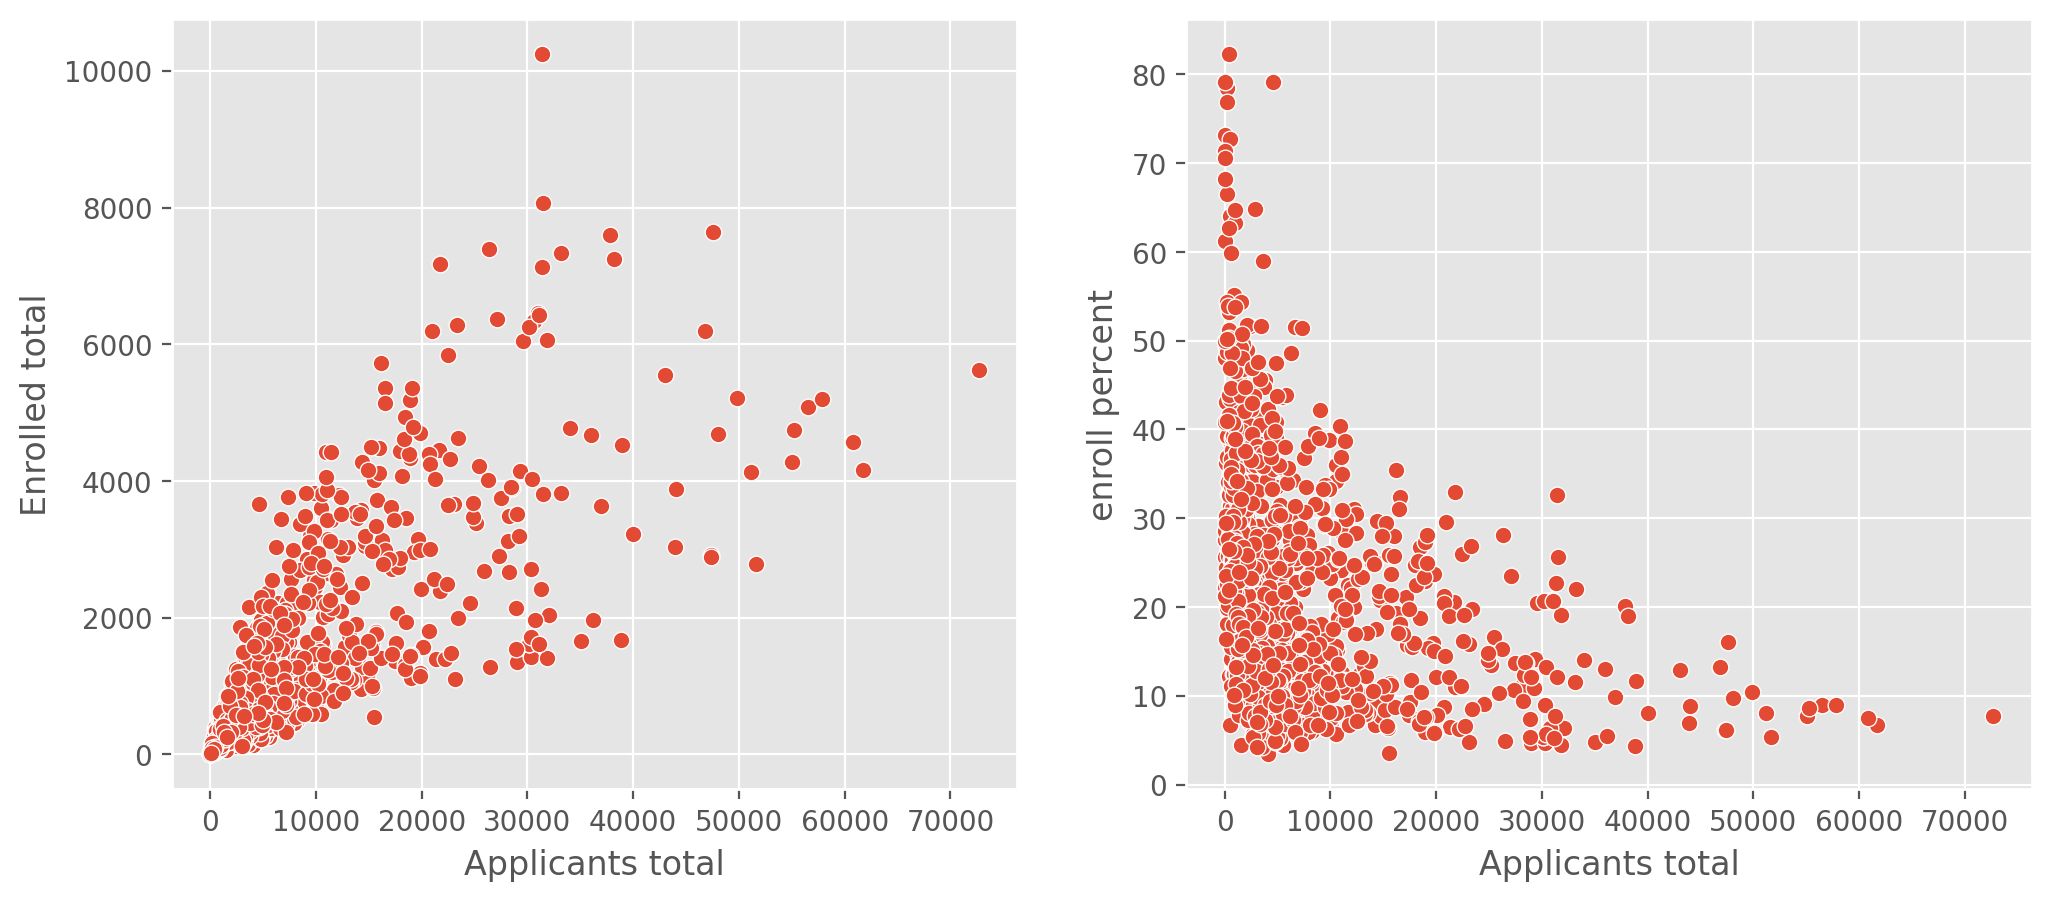

In [301]:
plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,2,1)
sns.scatterplot("Applicants total","Enrolled total",data=uni)

plt.subplot(1,2,2)
sns.scatterplot("Applicants total","enroll percent",data=uni)

In [302]:
# finding the correlation between Applicants total and enroll percent columns

cor_app_enroll=uni[["Applicants total","enroll percent"]].corr()
cor_app_enroll

,Applicants total,enroll percent
Applicants total,1.000000,-0.296748
enroll percent,-0.296748,1.000000


<AxesSubplot:>

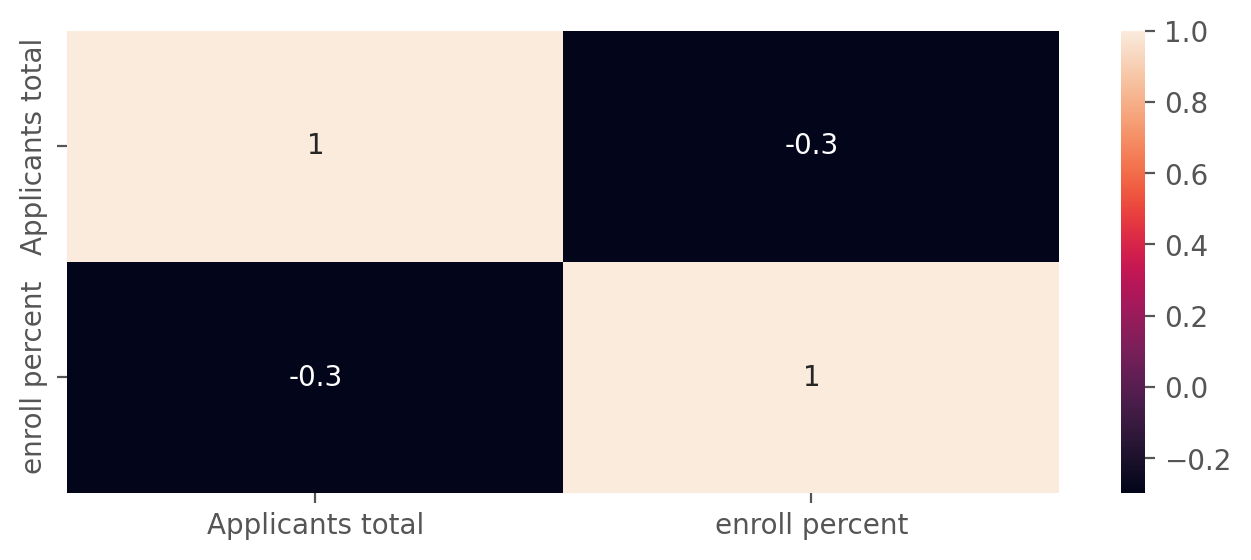

In [303]:
plt.figure(figsize=(8,3),dpi=200)
sns.heatmap(uni[["Applicants total","enroll percent"]].corr(),annot=True)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### * Here the universities which had less than 10000 applicants has the highest percentage of students enrolled with them compared to the universities having higher applicants.
##### *  very few universities which had received the applications around 20000-50000 have more than 6000 students enrolled with them.
##### *  The no.of applications received by the university and the no.of students enrolled with them has very less correlation of -0.3.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ----------------------------------------------------------------------------------------------------------------------------------

## 2.	Do students prefer universities that have a high rate of admission?

In [304]:
# creating a new data set with columns Name,Applicants total,Enrolled total and Admissions total from university

uni2=university[["Name","Applicants total","Enrolled total","Admissions total"]]
uni2

,Name,Applicants total,Enrolled total,Admissions total
0,Alabama A & M University,6142.0,1104.0,5521.0
1,University of Alabama at Birmingham,5689.0,1773.0,4934.0
2,Amridge University,NaN,NaN,NaN
3,University of Alabama in Huntsville,2054.0,651.0,1656.0
4,Alabama State University,10245.0,1479.0,5251.0
...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,86.0,136.0
1530,The Kingâ€™s College,3033.0,127.0,2158.0
1531,Ottawa University-Online,NaN,NaN,NaN
1532,Providence Christian College,122.0,20.0,65.0


In [305]:
# creating columns with values percentage of total enrolled students w.r.t admission total and admission total w.r.t applicants total

uni2["admit percent"]=(uni2["Admissions total"]/uni2["Applicants total"])*100
uni2["enroll-admit percent"]=(uni2["Enrolled total"]/uni2["Admissions total"])*100

In [306]:
uni2

,Name,Applicants total,Enrolled total,Admissions total,admit percent,enroll-admit percent
0,Alabama A & M University,6142.0,1104.0,5521.0,89.889287,19.996377
1,University of Alabama at Birmingham,5689.0,1773.0,4934.0,86.728775,35.934333
2,Amridge University,NaN,NaN,NaN,NaN,NaN
3,University of Alabama in Huntsville,2054.0,651.0,1656.0,80.623174,39.311594
4,Alabama State University,10245.0,1479.0,5251.0,51.254270,28.166064
...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,86.0,136.0,34.605598,63.235294
1530,The Kingâ€™s College,3033.0,127.0,2158.0,71.150676,5.885079
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN
1532,Providence Christian College,122.0,20.0,65.0,53.278689,30.769231


In [307]:
uni2[["admit percent","enroll-admit percent"]].corr()   # finding the correlation of columns admit percent and enroll-admit percent

,admit percent,enroll-admit percent
admit percent,1.000000,-0.071669
enroll-admit percent,-0.071669,1.000000


<AxesSubplot:>

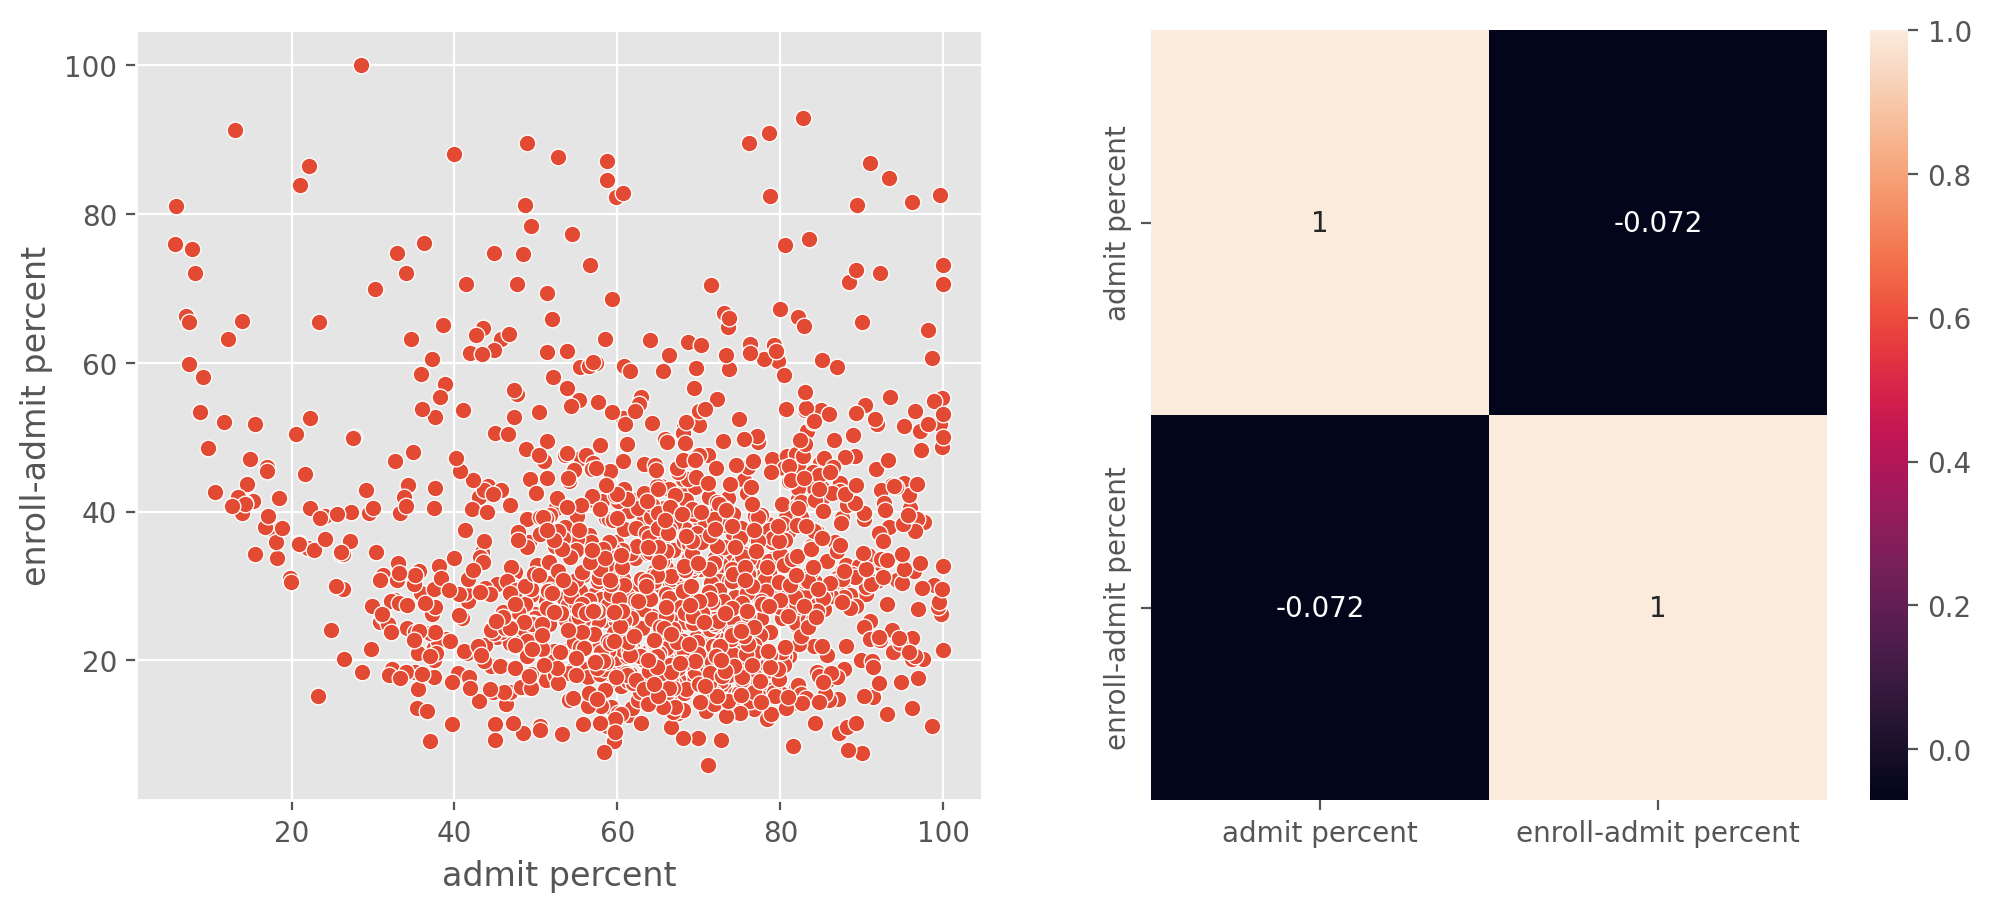

In [308]:
# plotting the analysis

plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,2,1)
sns.scatterplot("admit percent","enroll-admit percent",data=uni2)

plt.subplot(1,2,2)
sns.heatmap(uni2[["admit percent","enroll-admit percent"]].corr(),annot=True)

In [309]:
sorted_enroll_high=uni2.sort_values("admit percent",ascending=False).head(50) #sorting based on admit percent column
sorted_enroll_high

,Name,Applicants total,Enrolled total,Admissions total,admit percent,enroll-admit percent
451,University of Pikeville,1804.0,386.0,1804.0,100.000000,21.396896
633,Metropolitan State University,306.0,100.0,306.0,100.000000,32.679739
1479,Brandman University,34.0,24.0,34.0,100.000000,70.588235
95,Coleman University,82.0,60.0,82.0,100.000000,73.170732
1343,Goddard College,4.0,2.0,4.0,100.000000,50.000000
709,Montana State University-Northern,376.0,200.0,376.0,100.000000,53.191489
1385,Southern Virginia University,763.0,226.0,762.0,99.868938,29.658793
1313,The University of Texas at El Paso,6240.0,3033.0,6228.0,99.807692,48.699422
281,Lewis-Clark State College,861.0,475.0,859.0,99.767712,55.296857
799,College of Staten Island CUNY,9785.0,2556.0,9761.0,99.754727,26.185842


In [310]:
sorted_enroll_low=uni2.sort_values("admit percent").head(50)
sorted_enroll_low

,Name,Applicants total,Enrolled total,Admissions total,admit percent,enroll-admit percent
1469,Stanford University,38828.0,1677.0,2208.0,5.686618,75.951087
544,Harvard University,35023.0,1659.0,2047.0,5.844731,81.045432
179,Yale University,28977.0,1356.0,2043.0,7.050419,66.372981
760,Princeton University,26499.0,1285.0,1963.0,7.407827,65.461029
793,Columbia University in the City of New York,31851.0,1415.0,2362.0,7.415780,59.906859
795,Cooper Union for the Advancement of Science an...,3193.0,186.0,247.0,7.735672,75.303644
551,Massachusetts Institute of Technology,18989.0,1115.0,1548.0,8.152088,72.028424
289,University of Chicago,30304.0,1426.0,2670.0,8.810718,53.408240
1172,Brown University,28919.0,1543.0,2654.0,9.177357,58.138659
734,Dartmouth College,23110.0,1098.0,2260.0,9.779316,48.584071


<AxesSubplot:xlabel='admit percent', ylabel='enroll-admit percent'>

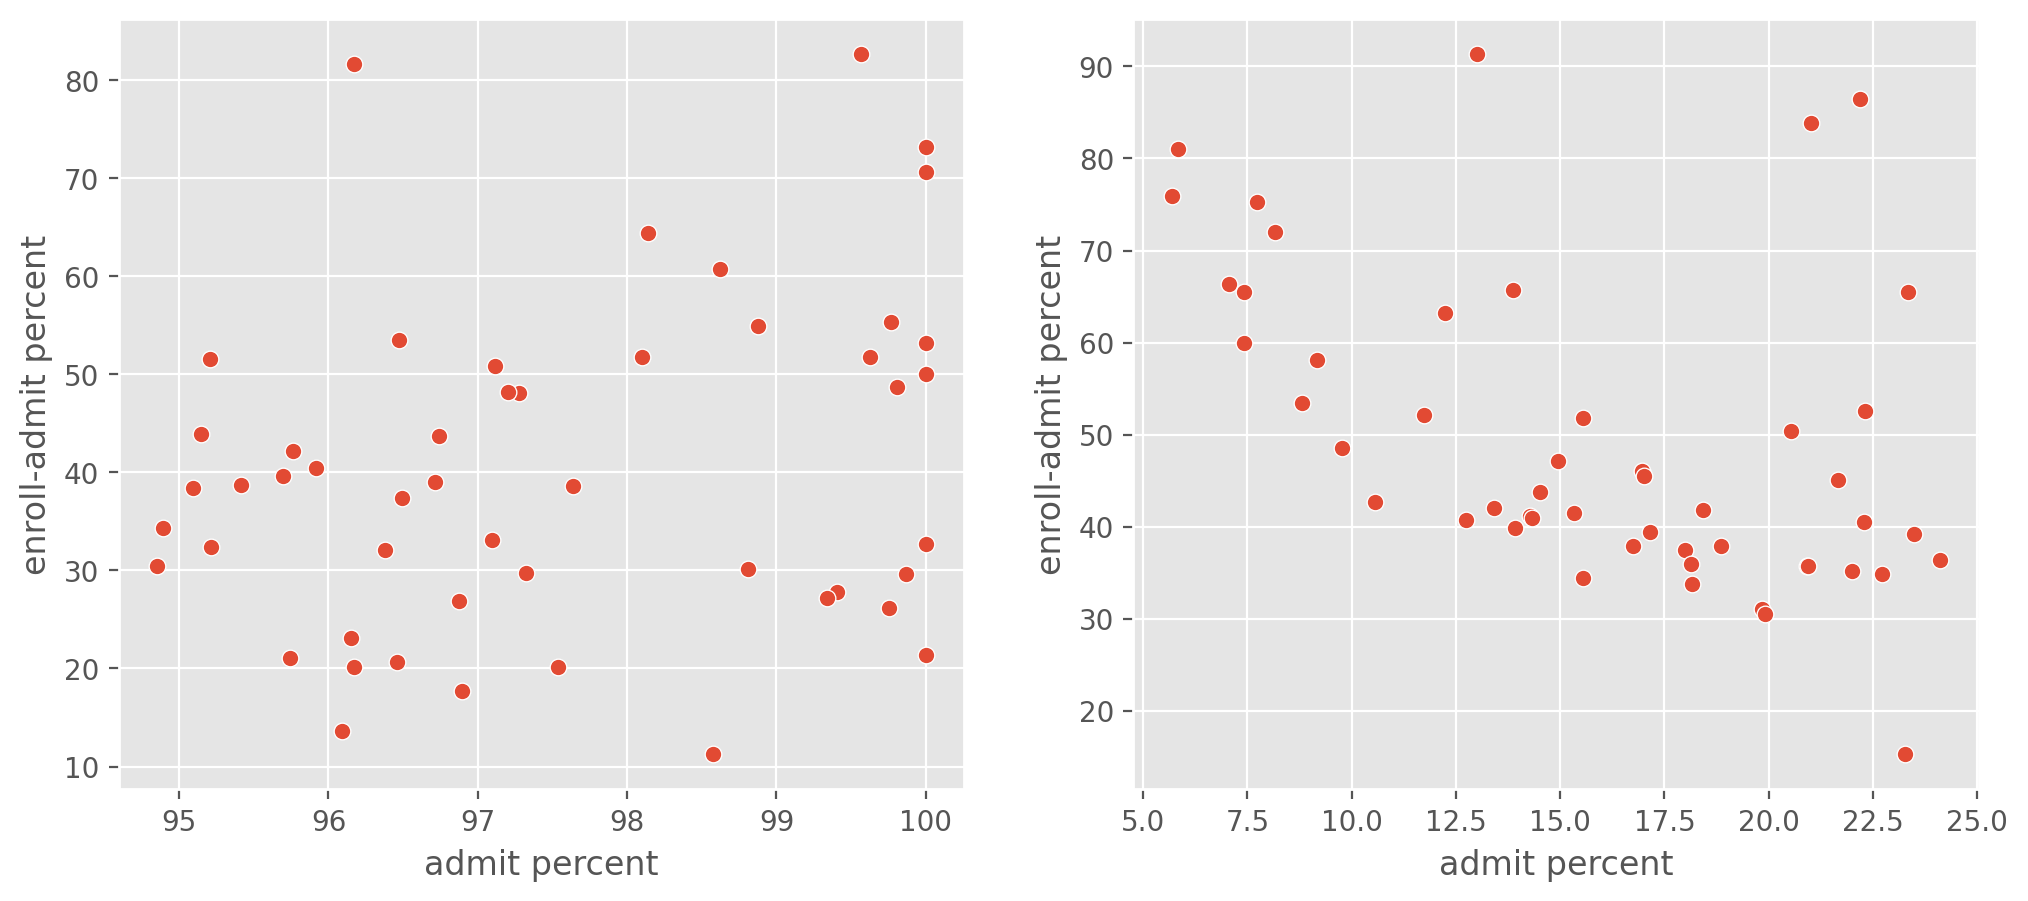

In [311]:
# displaying the enrollment percentage of top 50 and bottom 50 universities based on admission
plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,2,1)
sns.scatterplot("admit percent","enroll-admit percent",data=sorted_enroll_high)

plt.subplot(1,2,2)
sns.scatterplot("admit percent","enroll-admit percent",data=sorted_enroll_low)

## ------------------------------------------------------------------------------------------------------------------------------
 - Here we analysed that the percentage of total students who got admission to a university with respect to the number of applications and total students who actually enrolled  has very weak corelation. 
 - If we consider the top 50  universities and bottom 50 universities based on the percentage of  admission they have offered to the students ,we can see that universities which has selected  less than 25% of students from total applicants have more percentage of students enrolled with them than the universities which had admitted more than the 95% of the total applicants.
 - So based on the analysis we can say that higher rate of admission is the not the main reason for the students for preferring a particular university

## --------------------------------------------------------------------------------------------------------------------------

### 3.	Do students prefer public or private universities

In [312]:
university[["Name","Control of institution"]]

,Name,Control of institution
0,Alabama A & M University,Public
1,University of Alabama at Birmingham,Public
2,Amridge University,Private not-for-profit
3,University of Alabama in Huntsville,Public
4,Alabama State University,Public
...,...,...
1529,University of South Florida-Sarasota-Manatee,Public
1530,The Kingâ€™s College,Private not-for-profit
1531,Ottawa University-Online,Private not-for-profit
1532,Providence Christian College,Private not-for-profit


In [313]:
# calculating the total no.of public and private universities

uni_control=university["Control of institution"].value_counts()
uni_control

Private not-for-profit    971
Public                    563
Name: Control of institution, dtype: int64

In [314]:
# calculating the total no.of students enrolled in each sector

enroll_control=university[["Control of institution","Enrolled total"]].groupby("Control of institution")["Enrolled total"].sum()
enroll_control

Control of institution
Private not-for-profit    467960.0
Public                    968315.0
Name: Enrolled total, dtype: float64

In [315]:
# calculating the total no.of applicants in each sector

app_control=university[["Control of institution","Applicants total"]].groupby("Control of institution")["Applicants total"].sum()
app_control

Control of institution
Private not-for-profit    3932271.0
Public                    4868402.0
Name: Applicants total, dtype: float64

Text(0, 0.5, 'No.of enrollment')

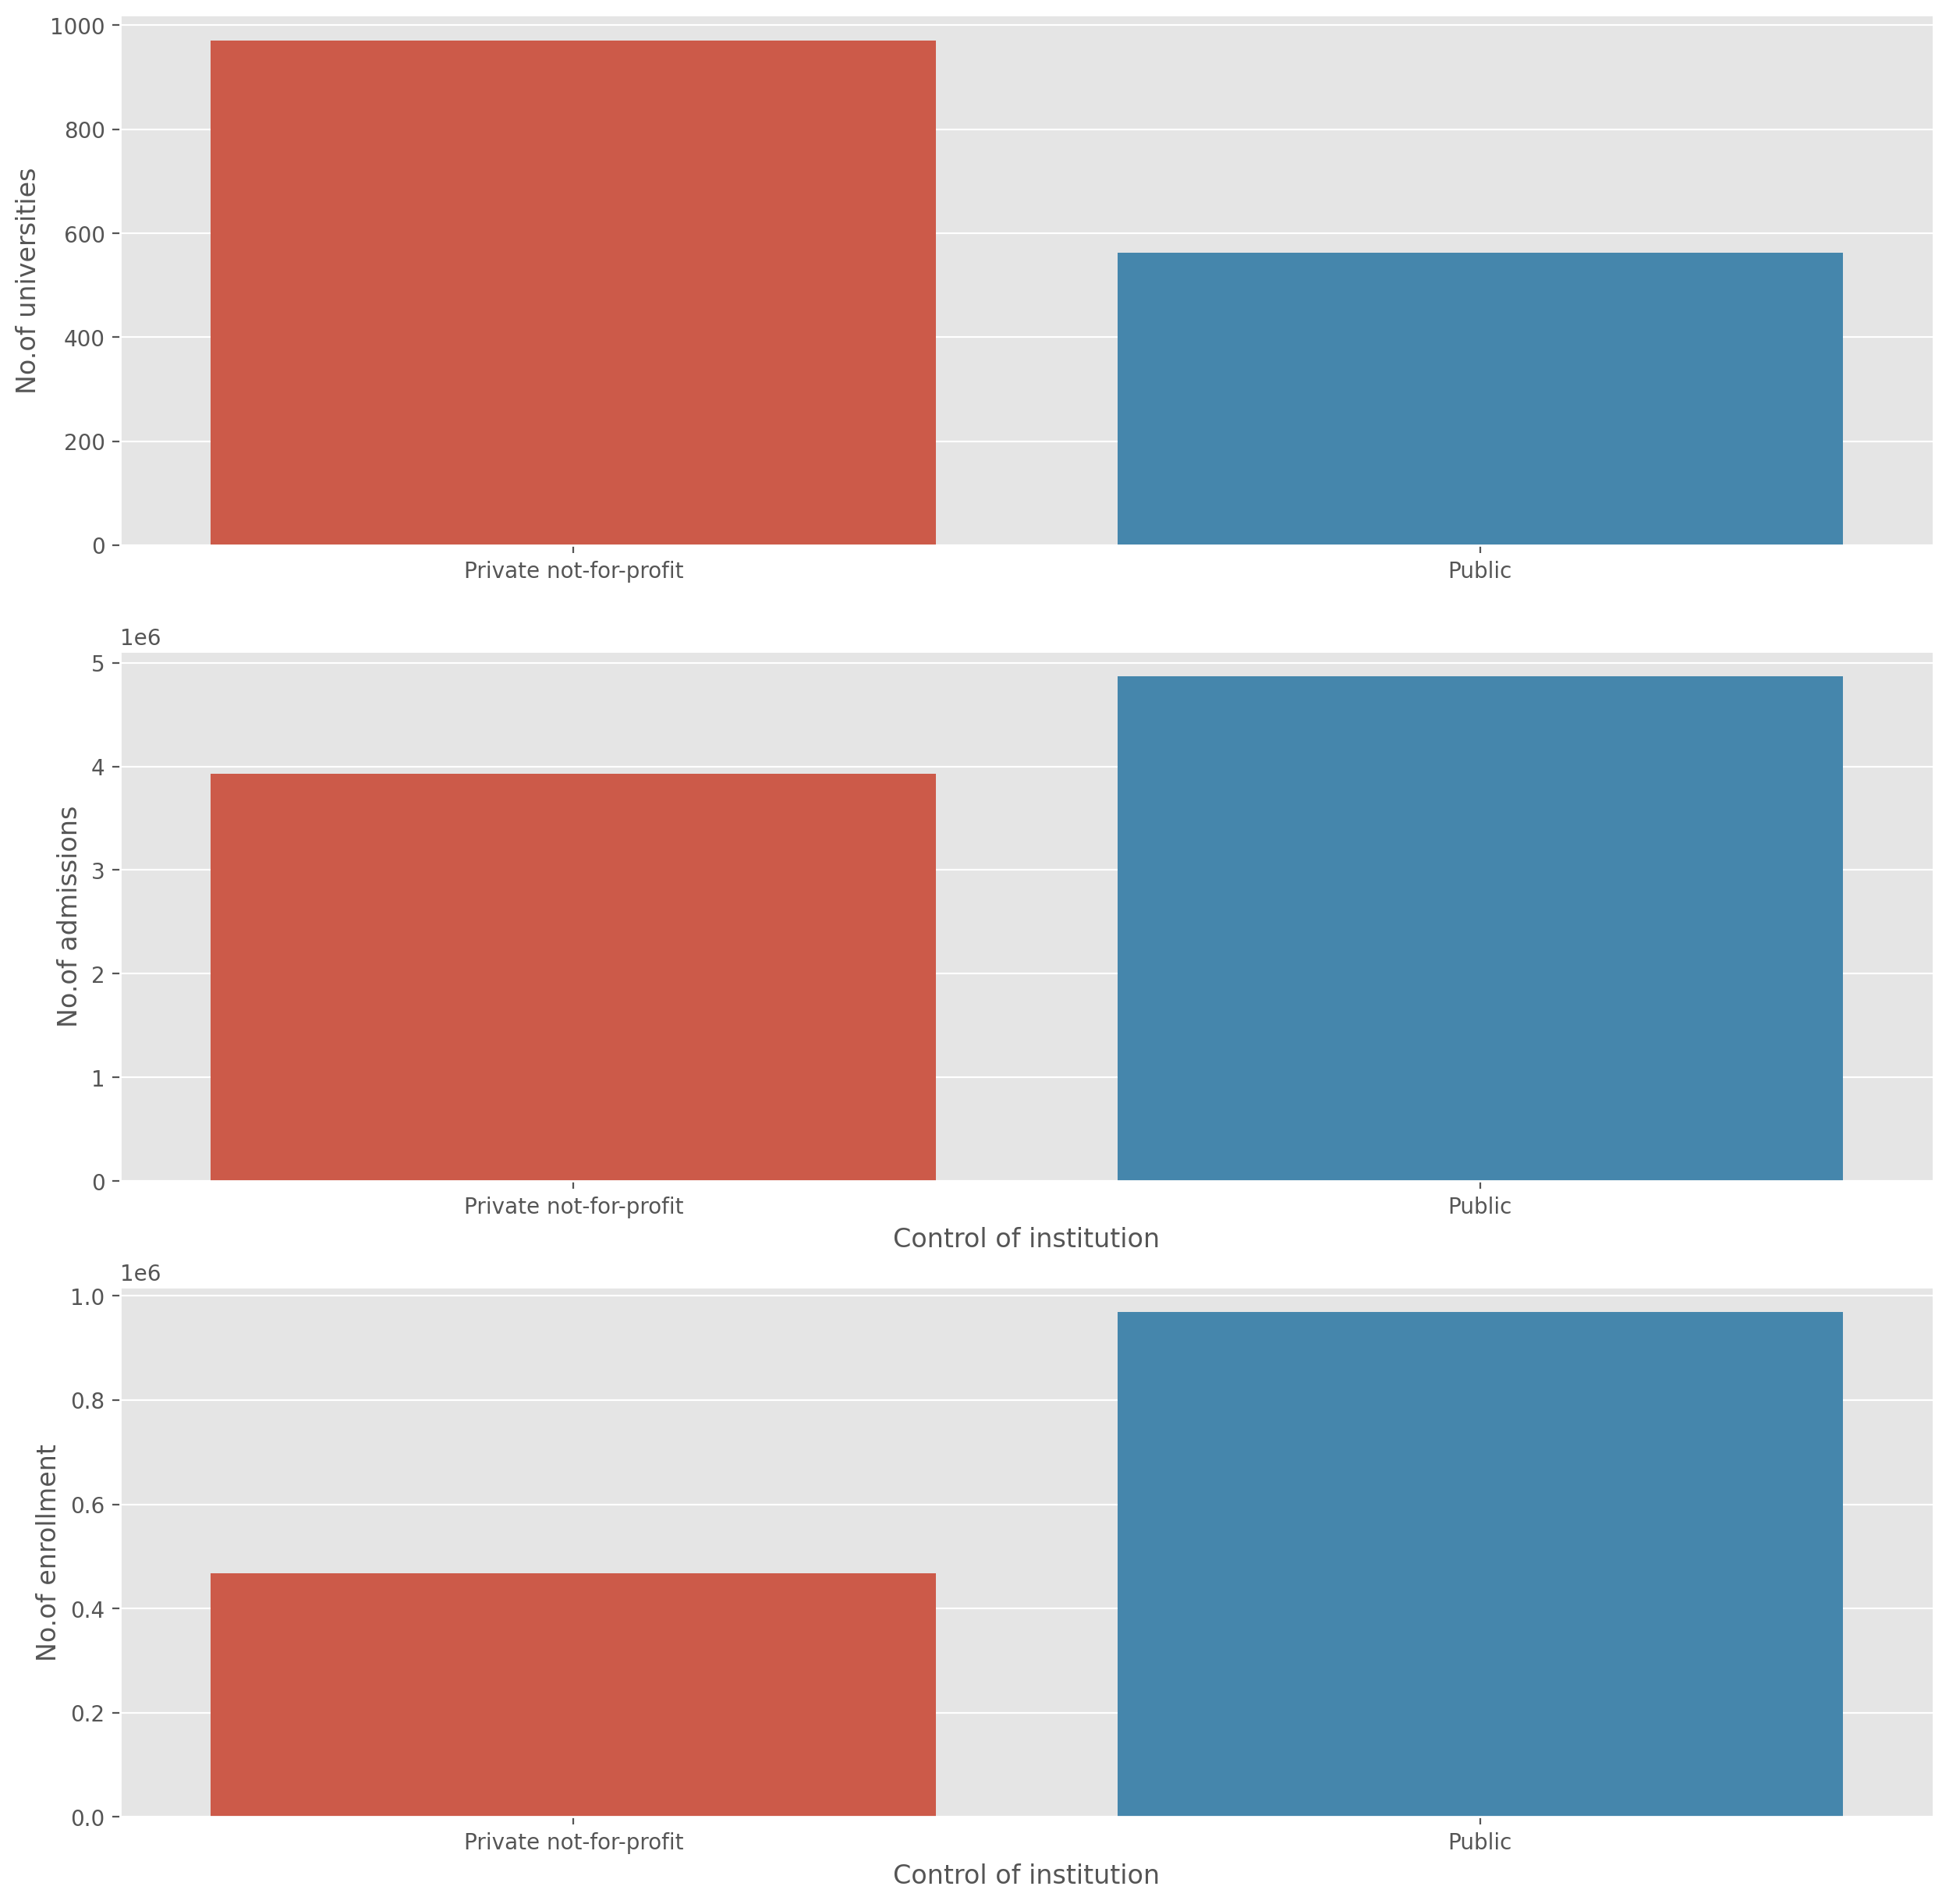

In [316]:
plt.figure(figsize=(15,15),dpi=200)
plt.subplot(3,1,1)
sns.barplot(uni_control.index,uni_control.values)
plt.ylabel("No.of universities")

plt.subplot(3,1,2)
sns.barplot(app_control.index,app_control.values)
plt.ylabel("No.of admissions")

plt.subplot(3,1,3)
sns.barplot(enroll_control.index,enroll_control.values)
plt.ylabel("No.of enrollment")

## ----------------------------------------------------------------------------------------------------------------------------------
 - Eventhough no.of universities in Private(not-for-profit) sector is more than Public sector ,most students had applied for admission in the public sectors.
 - And even the students prefered to enroll in Public universities than Private ones when they received the admission.

## ----------------------------------------------------------------------------------------------------------------------------------

### 4.	Do students prefer universities with low tuition and fees?

In [317]:
# creating a new dataset with columns "Name","Enrolled total" and "Tuition and fees, 2013-14" from university dataset

fees=university[["Name","Enrolled total","Tuition and fees, 2013-14"]]
fees

,Name,Enrolled total,"Tuition and fees, 2013-14"
0,Alabama A & M University,1104.0,7182.0
1,University of Alabama at Birmingham,1773.0,7206.0
2,Amridge University,NaN,6870.0
3,University of Alabama in Huntsville,651.0,9192.0
4,Alabama State University,1479.0,8720.0
...,...,...,...
1529,University of South Florida-Sarasota-Manatee,86.0,5587.0
1530,The Kingâ€™s College,127.0,31300.0
1531,Ottawa University-Online,NaN,NaN
1532,Providence Christian College,20.0,24222.0


In [318]:
fees.isnull().sum()                                        # searching for null values

Name                           0
Enrolled total               157
Tuition and fees, 2013-14     37
dtype: int64

In [319]:
avg_fees=fees["Tuition and fees, 2013-14"].mean()          # Finding the average tution fees
avg_fees

20727.490313961254

In [320]:
# replacing the columns having null tution fees with the average tution fees

fees['Tuition and fees, 2013-14'].fillna((fees['Tuition and fees, 2013-14'].mean()),inplace=True)
fees

,Name,Enrolled total,"Tuition and fees, 2013-14"
0,Alabama A & M University,1104.0,7182.000000
1,University of Alabama at Birmingham,1773.0,7206.000000
2,Amridge University,NaN,6870.000000
3,University of Alabama in Huntsville,651.0,9192.000000
4,Alabama State University,1479.0,8720.000000
...,...,...,...
1529,University of South Florida-Sarasota-Manatee,86.0,5587.000000
1530,The Kingâ€™s College,127.0,31300.000000
1531,Ottawa University-Online,NaN,20727.490314
1532,Providence Christian College,20.0,24222.000000


In [321]:
fees.describe()

,Enrolled total,"Tuition and fees, 2013-14"
count,1377.000000,1534.000000
mean,1043.046478,20727.490314
std,1285.165519,12304.572583
min,0.000000,1032.000000
25%,287.000000,8707.000000
50%,538.000000,20710.000000
75%,1246.000000,29807.500000
max,10241.000000,49138.000000


In [322]:
fees.sort_values("Tuition and fees, 2013-14",ascending=False).head(10)   # sorting based on Tuition and fees, 2013-14 column

,Name,Enrolled total,"Tuition and fees, 2013-14"
793,Columbia University in the City of New York,1415.0,49138.0
858,Sarah Lawrence College,344.0,48696.0
897,Vassar College,666.0,47890.0
1072,Carnegie Mellon University,1442.0,47642.0
289,University of Chicago,1426.0,47514.0
176,Trinity College,604.0,47510.0
188,George Washington University,2387.0,47343.0
177,Wesleyan University,752.0,47244.0
477,Tulane University of Louisiana,1609.0,46930.0
1068,Bucknell University,933.0,46902.0


In [323]:
# finding the correlation between "Enrolled total" and "Tuition and fees, 2013-14"

fees[["Enrolled total","Tuition and fees, 2013-14"]].corr()

,Enrolled total,"Tuition and fees, 2013-14"
Enrolled total,1.000000,-0.321142
"Tuition and fees, 2013-14",-0.321142,1.000000


<AxesSubplot:>

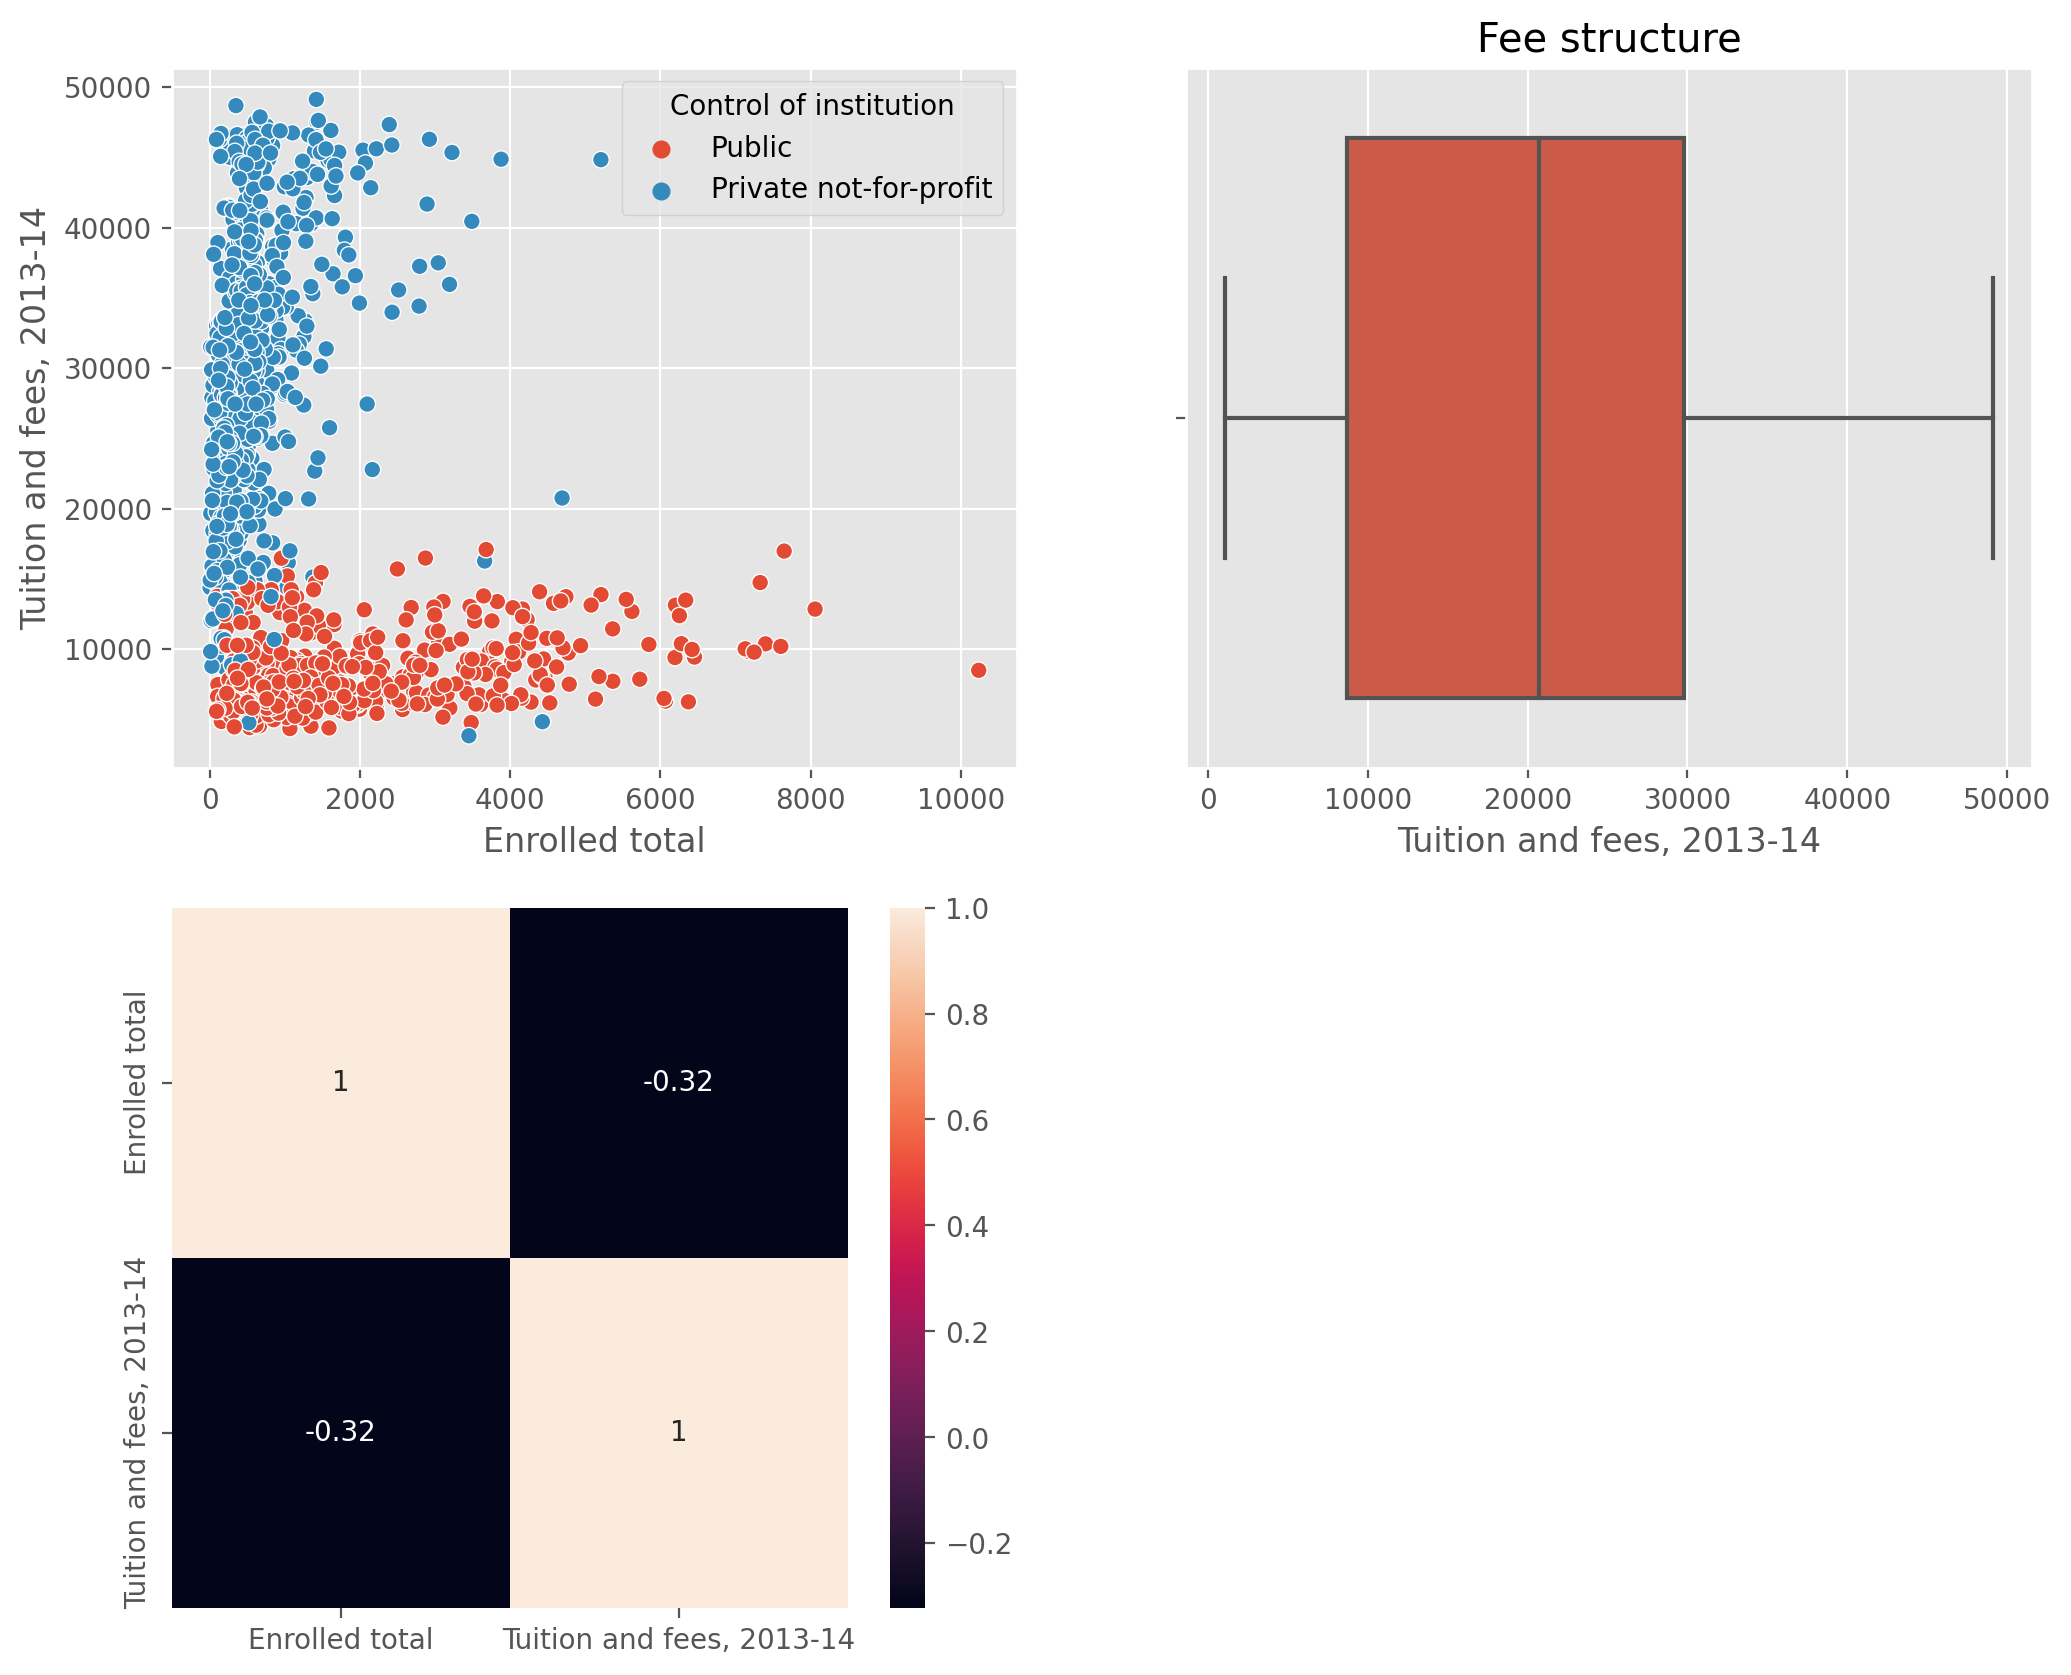

In [324]:
plt.figure(figsize=(12,10),dpi=200)
plt.subplot(2,2,1)
sns.scatterplot("Enrolled total","Tuition and fees, 2013-14",hue=university["Control of institution"],data=fees)

plt.subplot(2,2,2)
sns.boxplot(fees["Tuition and fees, 2013-14"])
plt.title("Fee structure")

plt.subplot(2,2,3)
sns.heatmap(fees[["Enrolled total","Tuition and fees, 2013-14"]].corr(),annot=True)

In [325]:
# finding the no.of students paying less than average fees

x=fees["Enrolled total"][fees["Tuition and fees, 2013-14"]<avg_fees].sum()
print("The no.of students paying less than average fees : ",x)

The no.of students paying less than average fees :  1025323.0


In [326]:
# finding the total no.of enrolled students

y=fees["Enrolled total"].sum()
print("The total no.of enrolled students : ",y)

The total no.of enrolled students :  1436275.0


In [327]:
print("Percentage of students paying less than average fees : ",x/y*100)

Percentage of students paying less than average fees :  71.38765208612557


In [328]:
university["Control of institution"].value_counts()    # no.of universities in each sector

Private not-for-profit    971
Public                    563
Name: Control of institution, dtype: int64

In [329]:
# No.of universities offering less than overall average fees in America

university["Control of institution"][fees["Tuition and fees, 2013-14"]<avg_fees].groupby(university["Control of institution"]).count()

Control of institution
Private not-for-profit    214
Public                    555
Name: Control of institution, dtype: int64

In [330]:
print("Percentage of private universities having average fees : ",round(214/971*100,2))
print("Percentage of public universities having average fees  : ",round(555/563*100,2))

Percentage of private universities having average fees :  22.04
Percentage of public universities having average fees  :  98.58


## ----------------------------------------------------------------------------------------------------------------------------------
- The tution fees for the year 2013-2014 ranges from 1000 to 50000.

- The total students enrolled in the universities and their tution fees has a moderate negative corelation of -0.32.

- overall we can see that the more than 70% of the students who had enrolled in the year 2013 has selected the universities which has less than the average tution fees along the country.

- Almost all the universities which comes under the Public sector and only 22% of universities under Private sector has less than the average fees.

## ----------------------------------------------------------------------------------------------------------------------------------

### 5.	Do students prefer a university for its low on-campus cost of living?

In [331]:
''' creating a new dataset with columns Name,Enrolled total,Total price for in-state students living on campus 2013-14 and 
    Total price for out-of-state students living on campus 2013-14 from university dataset '''

accomodation=university[["Name","Enrolled total","Total price for in-state students living on campus 2013-14","Total price for out-of-state students living on campus 2013-14"]]
accomodation

,Name,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
0,Alabama A & M University,1104.0,21849.0,27441.0
1,University of Alabama at Birmingham,1773.0,22495.0,31687.0
2,Amridge University,NaN,NaN,NaN
3,University of Alabama in Huntsville,651.0,23466.0,35780.0
4,Alabama State University,1479.0,18286.0,25222.0
...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,86.0,NaN,NaN
1530,The Kingâ€™s College,127.0,48717.0,48717.0
1531,Ottawa University-Online,NaN,NaN,NaN
1532,Providence Christian College,20.0,38602.0,38602.0


In [332]:
accomodation.isnull().sum()                    # checks for null values

Name                                                                0
Enrolled total                                                    157
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
dtype: int64

In [333]:
accomodation.describe()                       # statistics information of the dataset

,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
count,1377.000000,1400.000000,1400.000000
mean,1043.046478,34935.306429,38767.612857
std,1285.165519,13283.049319,10716.524007
min,0.000000,9768.000000,9768.000000
25%,287.000000,22487.000000,31128.000000
50%,538.000000,34115.000000,37193.500000
75%,1246.000000,44835.750000,45907.500000
max,10241.000000,64988.000000,64988.000000


In [334]:
# Replacing the null values with the average values of the respective columns

accomodation["Total price for in-state students living on campus 2013-14"]=accomodation["Total price for in-state students living on campus 2013-14"].fillna(accomodation["Total price for in-state students living on campus 2013-14"].mean())
accomodation["Total price for out-of-state students living on campus 2013-14"]=accomodation["Total price for out-of-state students living on campus 2013-14"].fillna(accomodation["Total price for out-of-state students living on campus 2013-14"].mean())

In [335]:
accomodation

,Name,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
0,Alabama A & M University,1104.0,21849.000000,27441.000000
1,University of Alabama at Birmingham,1773.0,22495.000000,31687.000000
2,Amridge University,NaN,34935.306429,38767.612857
3,University of Alabama in Huntsville,651.0,23466.000000,35780.000000
4,Alabama State University,1479.0,18286.000000,25222.000000
...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,86.0,34935.306429,38767.612857
1530,The Kingâ€™s College,127.0,48717.000000,48717.000000
1531,Ottawa University-Online,NaN,34935.306429,38767.612857
1532,Providence Christian College,20.0,38602.000000,38602.000000


<AxesSubplot:xlabel='Total price for out-of-state students living on campus 2013-14'>

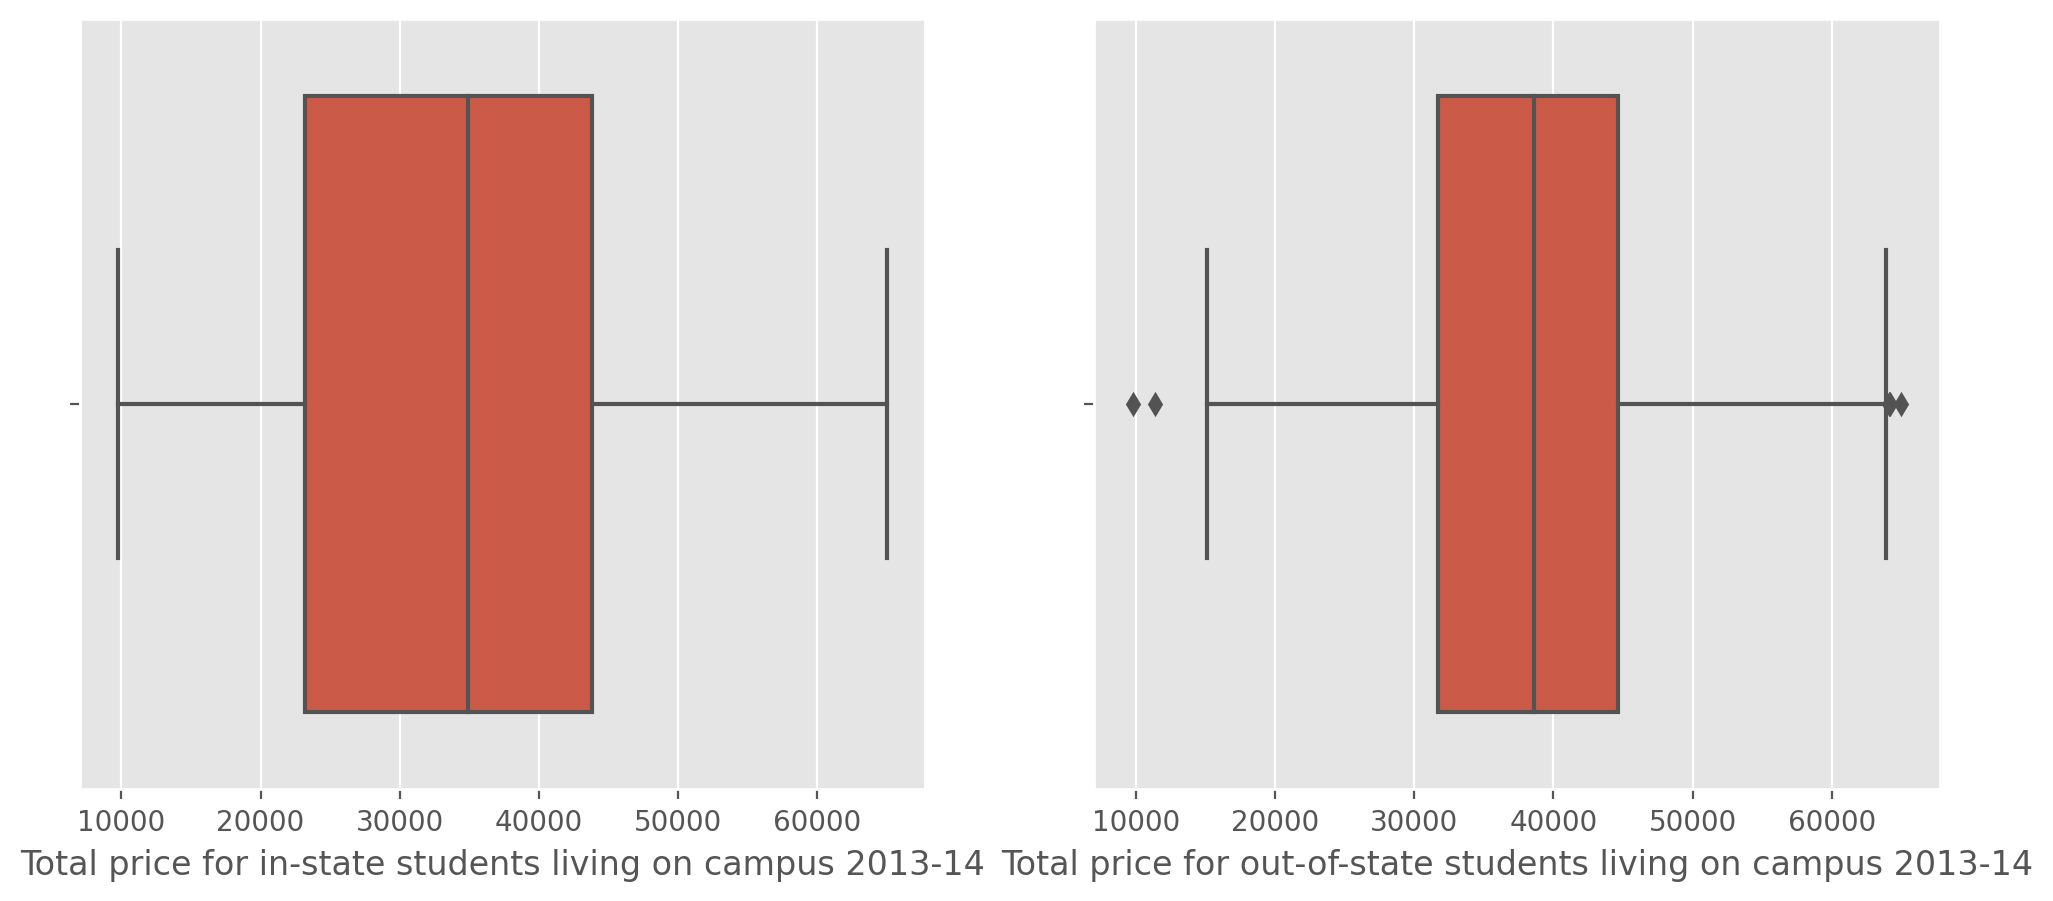

In [336]:
plt.figure(figsize=(12,5),dpi=200)
plt.subplot(1,2,1)
sns.boxplot(accomodation["Total price for in-state students living on campus 2013-14"])

plt.subplot(1,2,2)
sns.boxplot(accomodation["Total price for out-of-state students living on campus 2013-14"])

In [337]:
in_state=accomodation[["Enrolled total","Total price for in-state students living on campus 2013-14"]]
in_state.corr()

,Enrolled total,Total price for in-state students living on campus 2013-14
Enrolled total,1.000000,-0.283509
Total price for in-state students living on campus 2013-14,-0.283509,1.000000


In [338]:
out_state=accomodation[["Enrolled total","Total price for out-of-state students living on campus 2013-14"]]
out_state.corr()

,Enrolled total,Total price for out-of-state students living on campus 2013-14
Enrolled total,1.000000,0.009606
Total price for out-of-state students living on campus 2013-14,0.009606,1.000000


<AxesSubplot:>

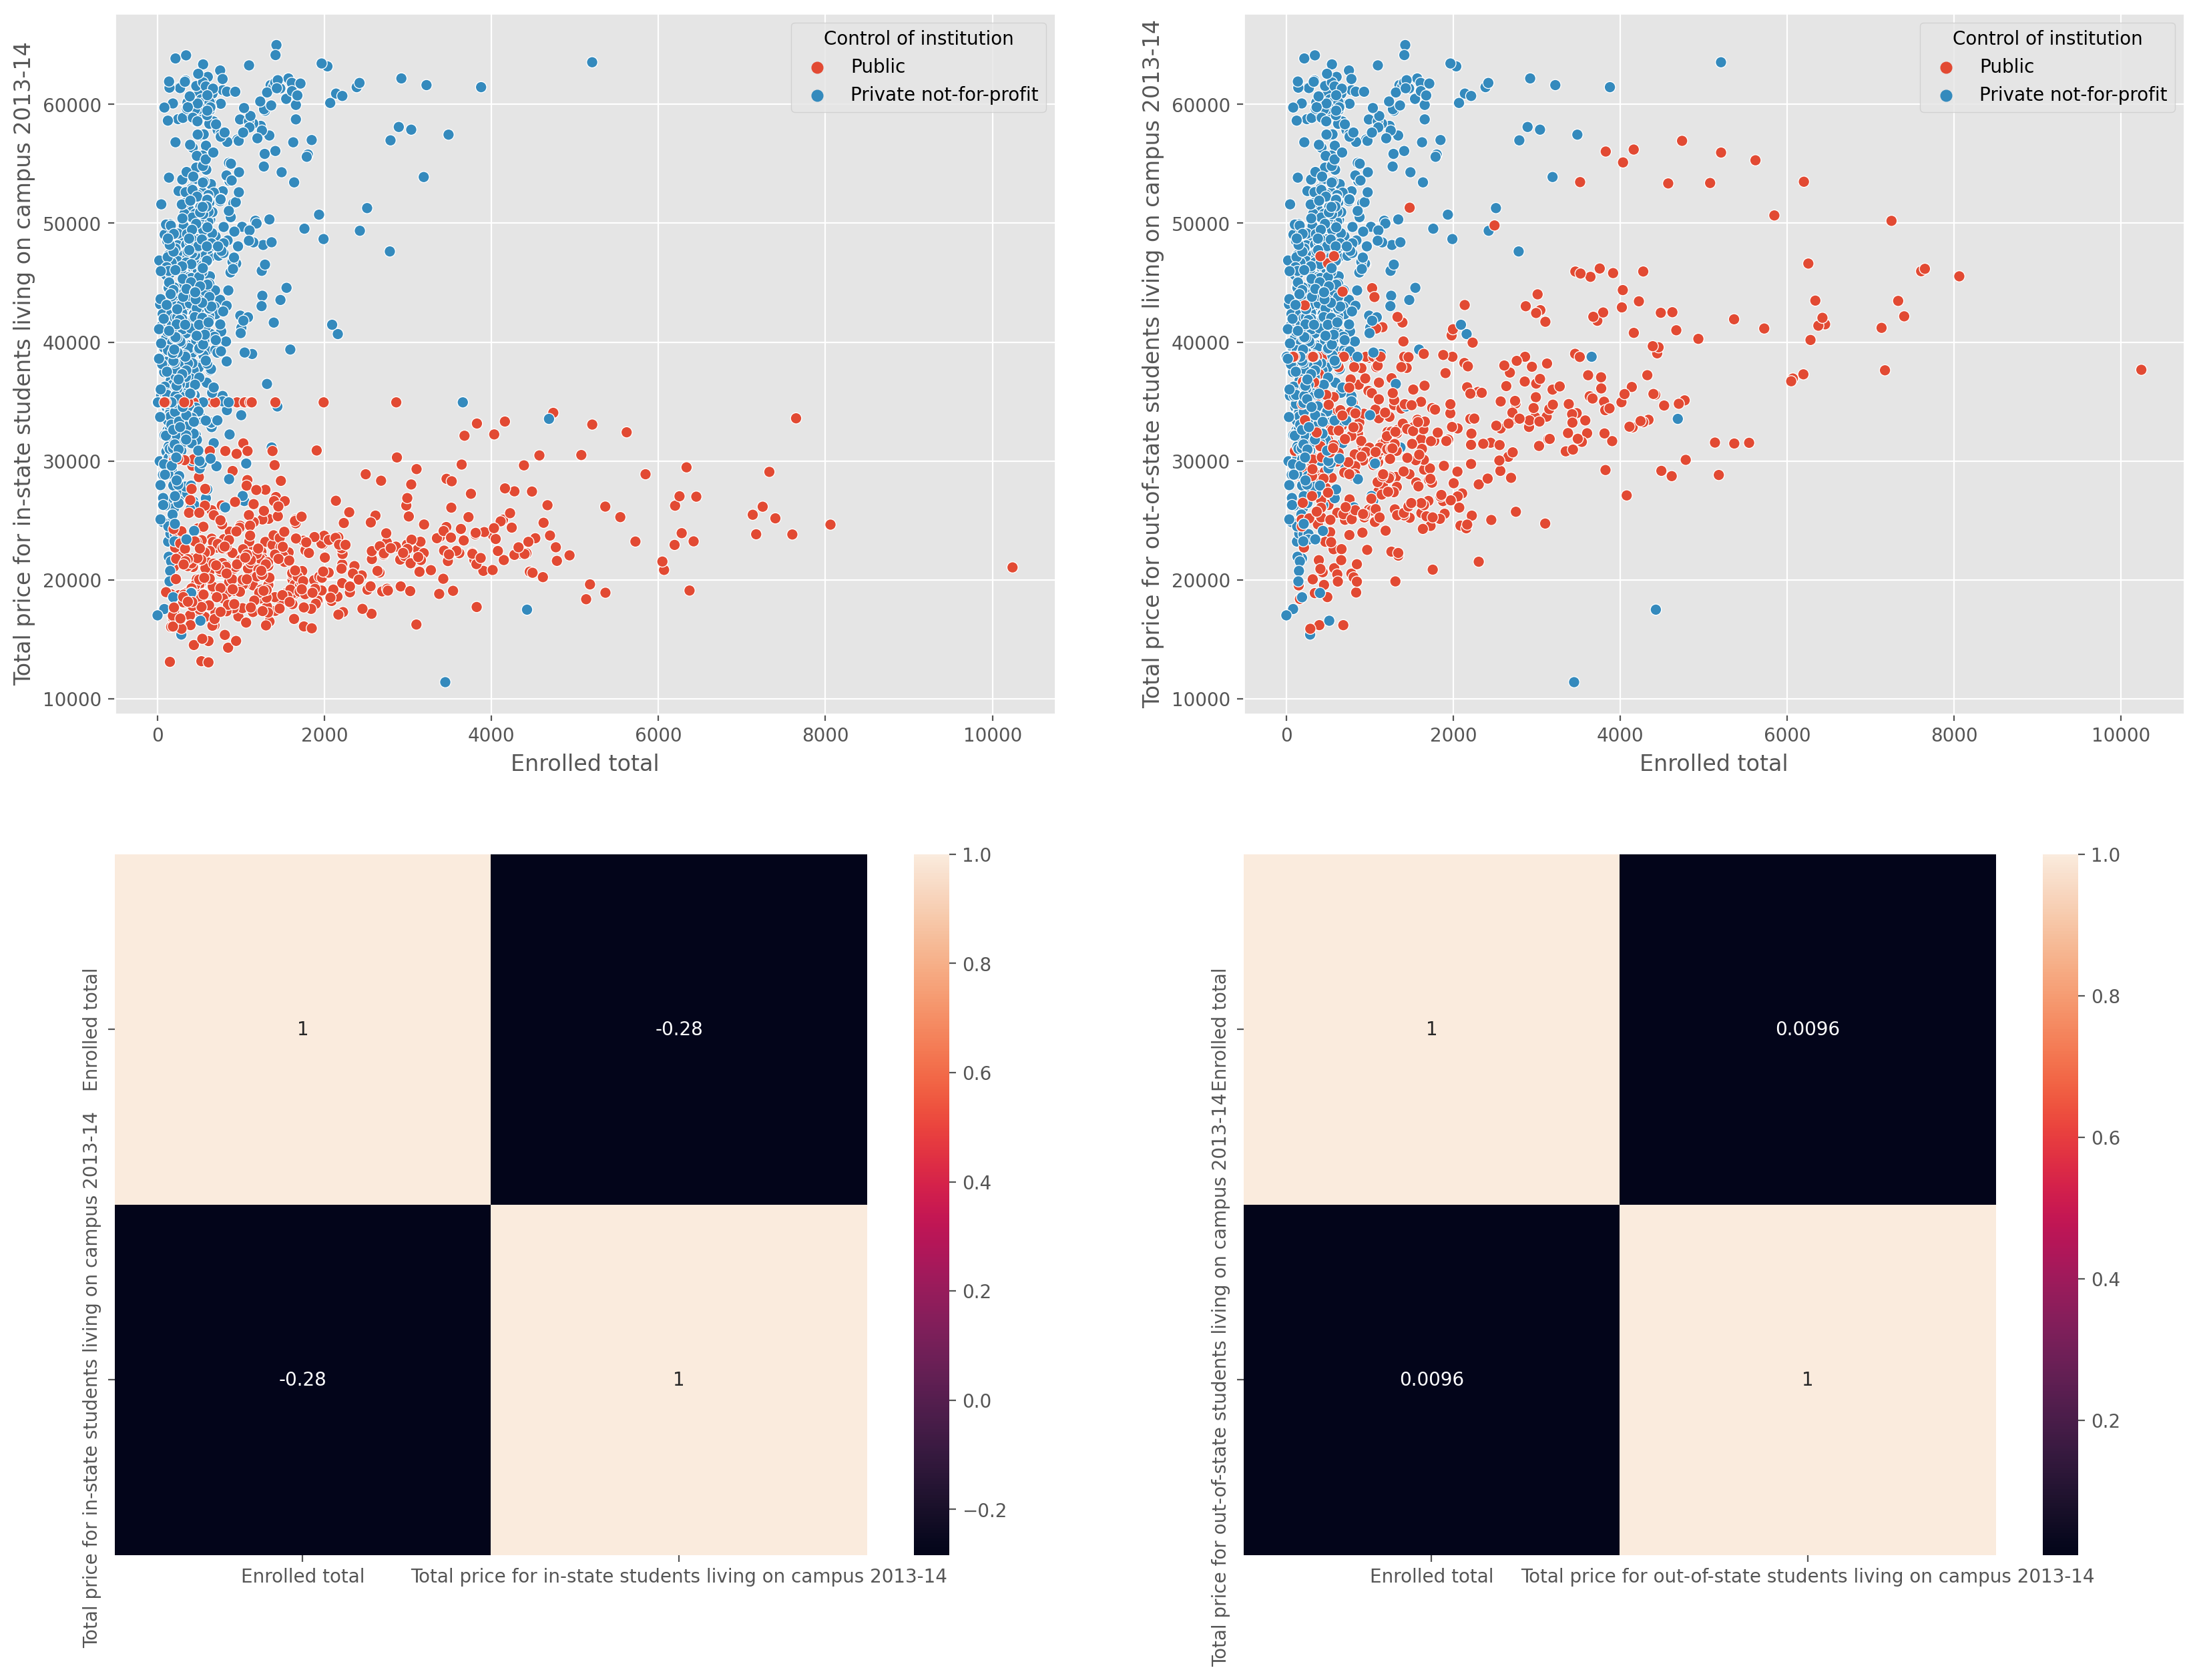

In [339]:
plt.figure(figsize=(20,15),dpi=200)

plt.subplot(2,2,1)
sns.scatterplot("Enrolled total","Total price for in-state students living on campus 2013-14",hue=university["Control of institution"],data=accomodation)

plt.subplot(2,2,2)
sns.scatterplot("Enrolled total","Total price for out-of-state students living on campus 2013-14",hue=university["Control of institution"],data=accomodation)

plt.subplot(2,2,3)
sns.heatmap(in_state.corr(),annot=True)

plt.subplot(2,2,4)
sns.heatmap(out_state.corr(),annot=True)


In [340]:
# finding the average accomodation cost of in-state and out-of-state students

in_state_mean=university["Total price for in-state students living on campus 2013-14"].mean()
out_state_mean=university["Total price for out-of-state students living on campus 2013-14"].mean()

In [341]:
a = accomodation["Enrolled total"][accomodation["Total price for in-state students living on campus 2013-14"]<in_state_mean].sum()
print("Number of in-state students paying less than average accomodation cost : ",a)

Number of in-state students paying less than average accomodation cost :  1017443.0


In [342]:
b=accomodation["Enrolled total"][accomodation["Total price for out-of-state students living on campus 2013-14"]<out_state_mean].sum()
print("Number of out-of-state students paying less than average accomodation cost : ",b)

Number of out-of-state students paying less than average accomodation cost :  769252.0


In [343]:
c=accomodation["Enrolled total"].sum()
print("Total no.of students : ",c)

Total no.of students :  1436275.0


In [344]:
print("Percentage of Enrolled in-state students who pays less than average accomodation cost : ",a/c*100)

Percentage of Enrolled in-state students who pays less than average accomodation cost :  70.83901063514996


In [345]:
print("Percentage of Enrolled out-of-state students who pays less than average accomodation cost : ",b/c*100)

Percentage of Enrolled out-of-state students who pays less than average accomodation cost :  53.55882404135698


## ----------------------------------------------------------------------------------------------------------------------------------
- Among the in-state students who prefered to chose living on campus in the year 2013-2014, 70.83 % of them choose the universities with less than average accomodation cost.
- and among the out-of-state students who prefered to chose living on campus in the year 2013-2014, 53.55% of them choose the universities with less than average accomodation cost.


## ----------------------------------------------------------------------------------------------------------------------------------

### 6.	Do students prefer a university because it belongs to a state with a high GDP per capita?

In [346]:
states_gdp =pd.read_csv("states_gdp.csv")  # accessing the dataset states_gdp

In [347]:
states_gdp.info()                          # basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         51 non-null     int64  
 1   state        51 non-null     object 
 2   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [348]:
states_gdp.duplicated().sum()              # checking for duplicated values

0

In [349]:
states_gdp.isnull().sum()                  # checking for null values

code           0
state          0
gdp_million    0
dtype: int64

In [350]:
# finding the total no.of applicants and enrolled students in each state

states=university.groupby("State abbreviation")["Applicants total","Enrolled total"].sum().sort_index()
states

,Applicants total,Enrolled total
State abbreviation,,
Alabama,122489.0,26226.0
Alaska,494.0,33.0
Arizona,84520.0,19931.0
Arkansas,57196.0,16609.0
California,1188841.0,120777.0
Colorado,117825.0,26057.0
Connecticut,169126.0,18529.0
Delaware,37275.0,5816.0
District of Columbia,79414.0,8292.0


In [351]:
states.index=range(0,51)
states

,Applicants total,Enrolled total
0,122489.0,26226.0
1,494.0,33.0
2,84520.0,19931.0
3,57196.0,16609.0
4,1188841.0,120777.0
5,117825.0,26057.0
6,169126.0,18529.0
7,37275.0,5816.0
8,79414.0,8292.0
9,343072.0,56893.0


In [352]:
enroll_gdp=pd.concat([states_gdp,states],axis=1)       # joining the datasets states and states_gdp
enroll_gdp.head()

,code,state,gdp_million,Applicants total,Enrolled total
0,1000,Alabama,191481.0,122489.0,26226.0
1,2000,Alaska,56622.8,494.0,33.0
2,4000,Arizona,275199.1,84520.0,19931.0
3,5000,Arkansas,114251.5,57196.0,16609.0
4,6000,California,2262771.2,1188841.0,120777.0


In [353]:
enroll_gdp.sort_values(by="gdp_million",ascending=False).head()

,code,state,gdp_million,Applicants total,Enrolled total
4,6000,California,2262771.2,1188841.0,120777.0
43,48000,Texas,1502249.8,446691.0,93767.0
32,36000,New York,1355581.4,1024210.0,111033.0
9,12000,Florida,800704.1,343072.0,56893.0
13,17000,Illinois,739627.9,344835.0,50238.0


In [354]:
enroll_gdp.describe()

,code,gdp_million,Applicants total,Enrolled total
count,51.000000,5.100000e+01,5.100000e+01,51.000000
mean,28960.784314,3.268928e+05,1.725622e+05,28162.254902
std,15832.827649,4.088304e+05,2.291227e+05,27043.783602
min,1000.000000,2.909880e+04,4.940000e+02,33.000000
25%,16500.000000,8.209975e+04,4.510900e+04,8740.500000
50%,29000.000000,1.830149e+05,1.035770e+05,19524.000000
75%,41500.000000,4.260313e+05,1.892565e+05,36132.000000
max,56000.000000,2.262771e+06,1.188841e+06,120777.000000


In [355]:
enroll_gdp[["gdp_million","Enrolled total"]].corr()

,gdp_million,Enrolled total
gdp_million,1.000000,0.929593
Enrolled total,0.929593,1.000000


In [356]:
enroll_gdp[["gdp_million","Applicants total"]].corr()

,gdp_million,Applicants total
gdp_million,1.000000,0.926486
Applicants total,0.926486,1.000000


<AxesSubplot:>

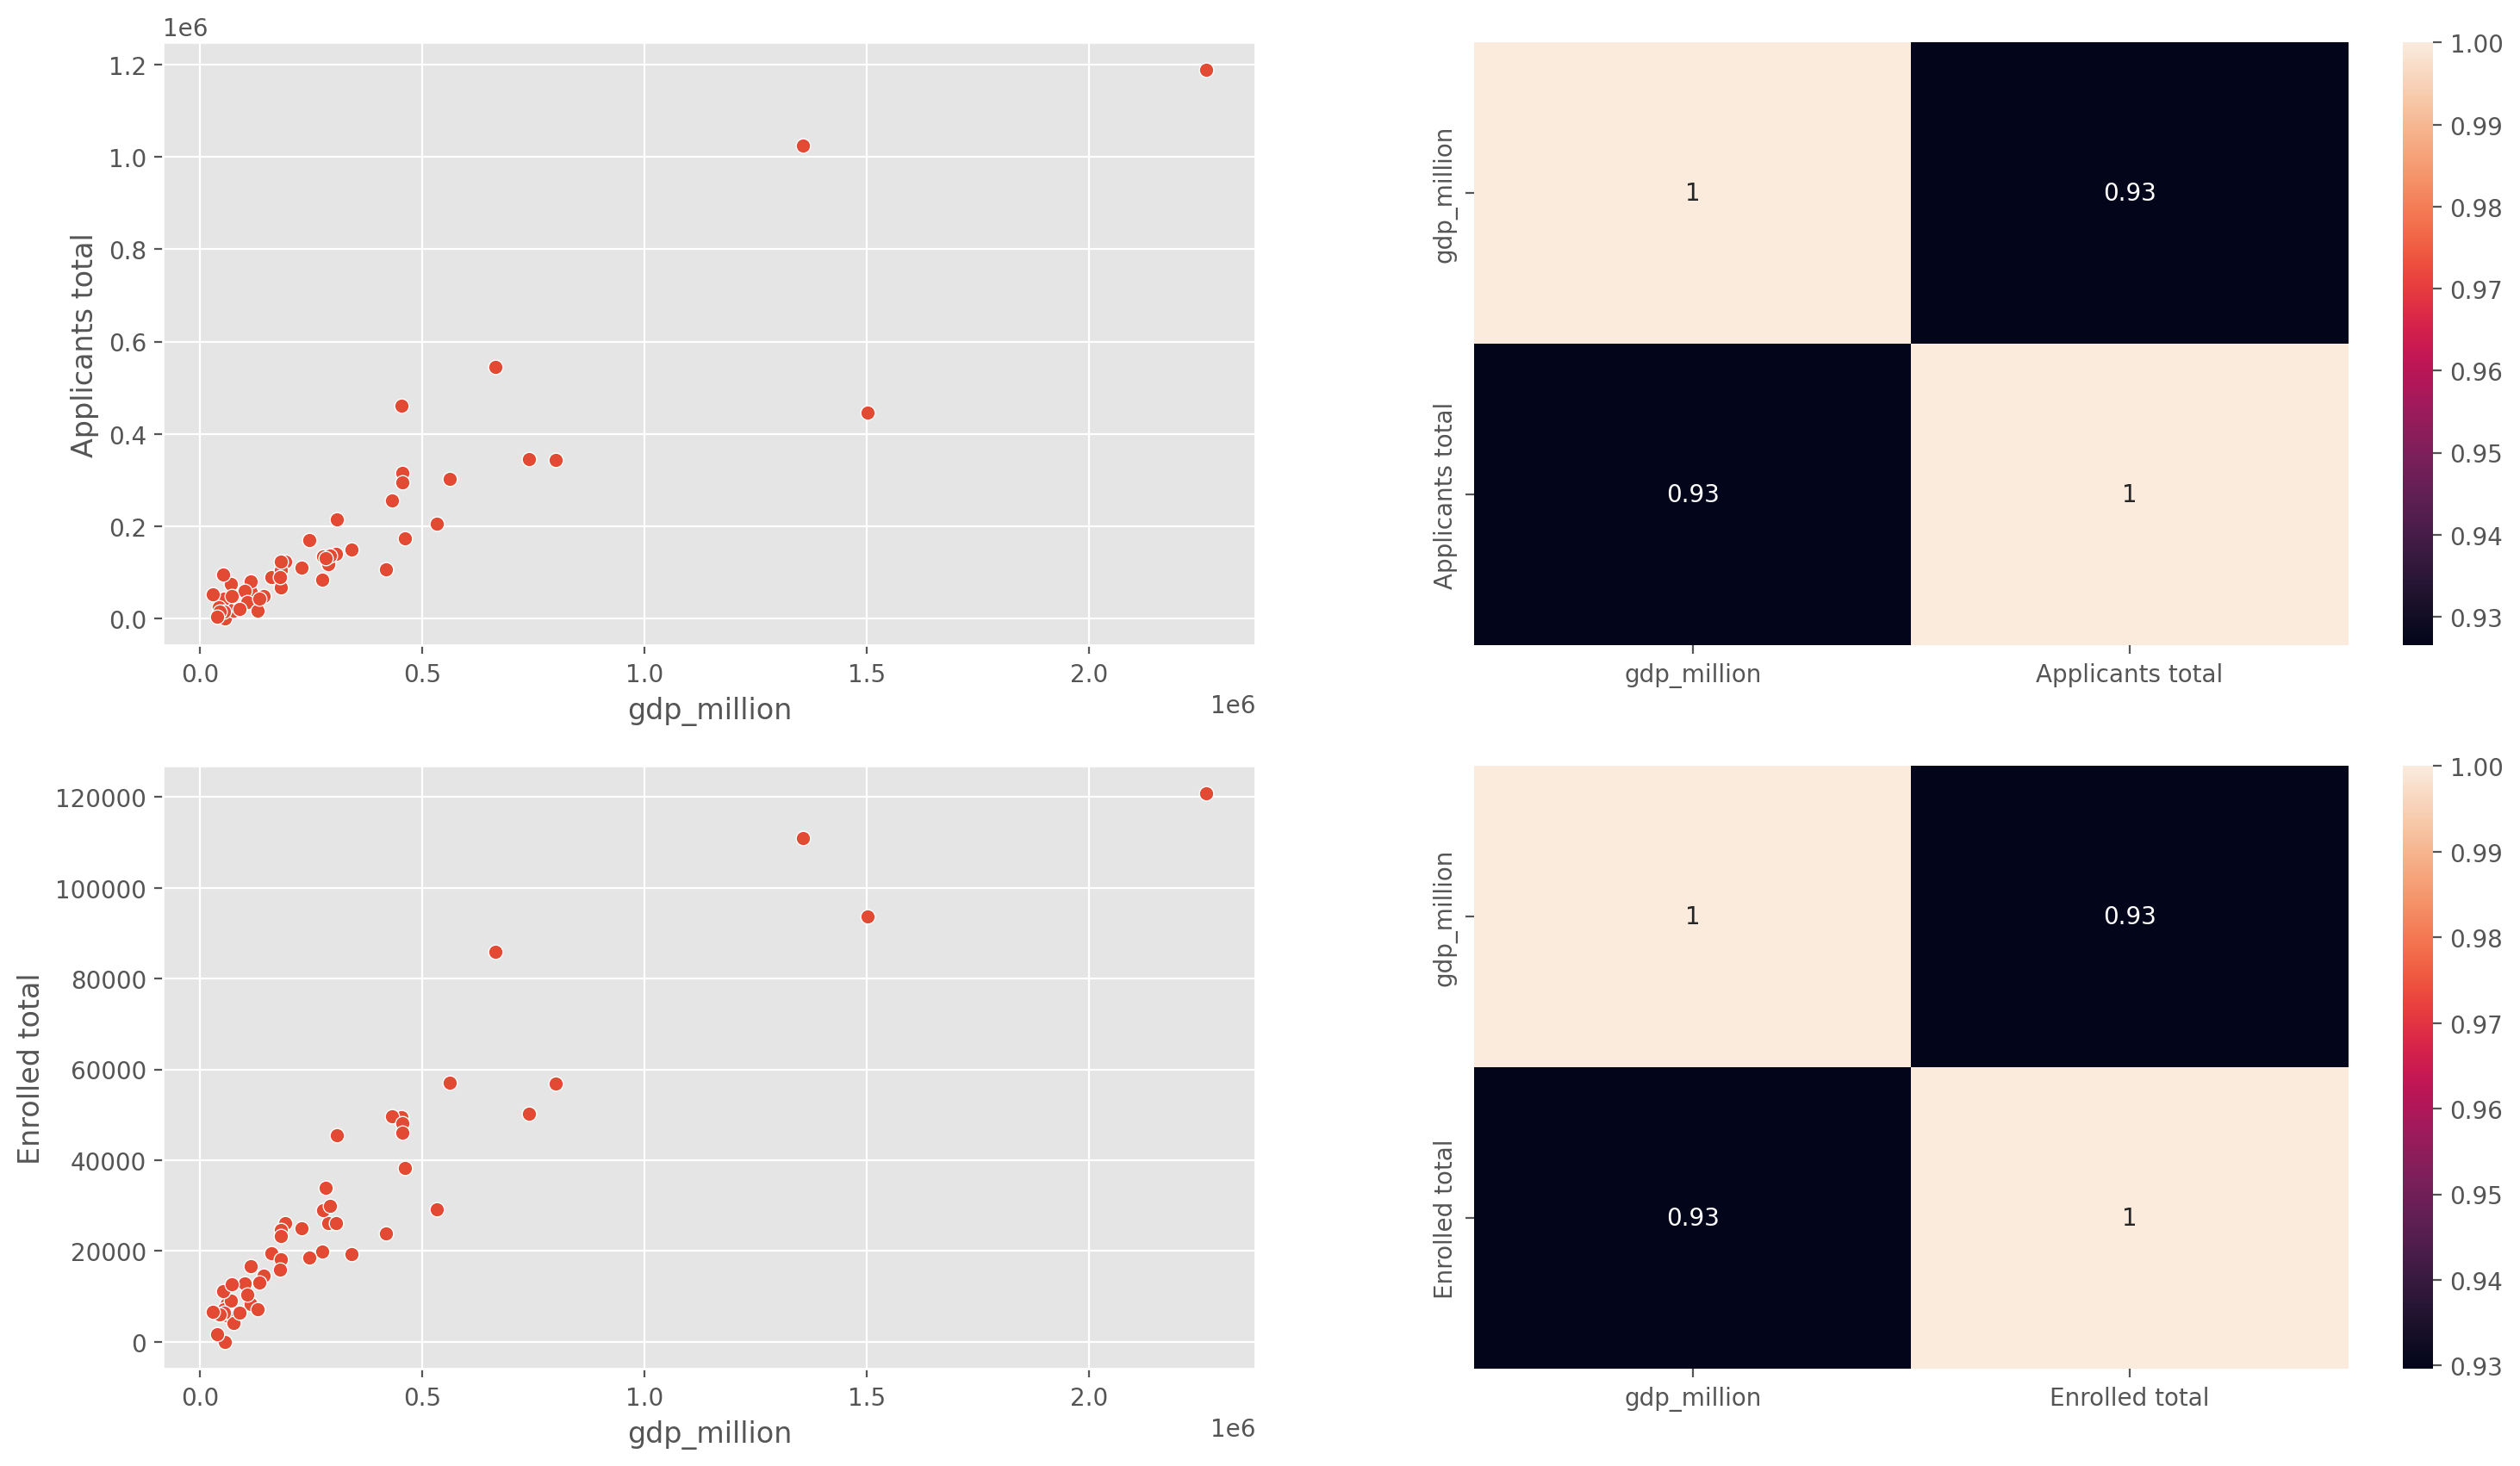

In [357]:
plt.figure(figsize=(18,10),dpi=200)

plt.subplot(2,2,1)
sns.scatterplot("gdp_million","Applicants total",data=enroll_gdp)

plt.subplot(2,2,2)
sns.heatmap(enroll_gdp[["gdp_million","Applicants total"]].corr(),annot=True)

plt.subplot(2,2,3)
sns.scatterplot("gdp_million","Enrolled total",data=enroll_gdp)

plt.subplot(2,2,4)
sns.heatmap(enroll_gdp[["gdp_million","Enrolled total"]].corr(),annot=True)

## ----------------------------------------------------------------------------------------------------------------------------------
- Here the total number of applicants in a particluar state and the gdp of that state has a high correlation of .93
- And the total no.of enrolled students in a state and the gdp of that state also has a high correlation of .93

## ----------------------------------------------------------------------------------------------------------------------------------

### 7.	Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [358]:
# creating a new data set with columns "Name","Enrolled total" and "Highest degree offered" from university dataset

higher_stud=university[["Name","Enrolled total","Highest degree offered"]]
higher_stud

,Name,Enrolled total,Highest degree offered
0,Alabama A & M University,1104.0,Doctor's degree - research/scholarship
1,University of Alabama at Birmingham,1773.0,Doctor's degree - research/scholarship and pro...
2,Amridge University,NaN,Doctor's degree - research/scholarship and pro...
3,University of Alabama in Huntsville,651.0,Doctor's degree - research/scholarship and pro...
4,Alabama State University,1479.0,Doctor's degree - research/scholarship and pro...
...,...,...,...
1529,University of South Florida-Sarasota-Manatee,86.0,Master's degree
1530,The Kingâ€™s College,127.0,Bachelor's degree
1531,Ottawa University-Online,NaN,Master's degree
1532,Providence Christian College,20.0,Bachelor's degree


In [359]:
higher_stud.isnull().sum()                                   # checking for null values

Name                        0
Enrolled total            157
Highest degree offered      0
dtype: int64

In [360]:
mean1=int(higher_stud["Enrolled total"].mean())             # finding the average no.of enrolled students
mean1

1043

In [361]:
# replacing the null values with average value in "Enrolles total" column

higher_stud["Enrolled total"]=higher_stud["Enrolled total"].fillna(mean1)

In [362]:
higher_stud.isnull().sum()

Name                      0
Enrolled total            0
Highest degree offered    0
dtype: int64

In [363]:
# finding the no.of university which offers a particluar highest degree

higher_stud["Highest degree offered"].value_counts()

Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Bachelor's degree                                                   282
Doctor's degree - research/scholarship                              201
Doctor's degree - professional practice                             125
Doctor's degree - other                                              28
Name: Highest degree offered, dtype: int64

In [364]:
# finding the no.of students enrolled in universities having the mentioned highest degree

high_enroll=higher_stud[["Highest degree offered","Enrolled total"]].groupby("Highest degree offered")["Enrolled total"].sum()
high_enroll

Highest degree offered
Bachelor's degree                                                   144488.0
Doctor's degree - other                                              36158.0
Doctor's degree - professional practice                             103803.0
Doctor's degree - research/scholarship                              225515.0
Doctor's degree - research/scholarship and professional practice    732743.0
Master's degree                                                     357319.0
Name: Enrolled total, dtype: float64

<AxesSubplot:ylabel='Highest degree offered'>

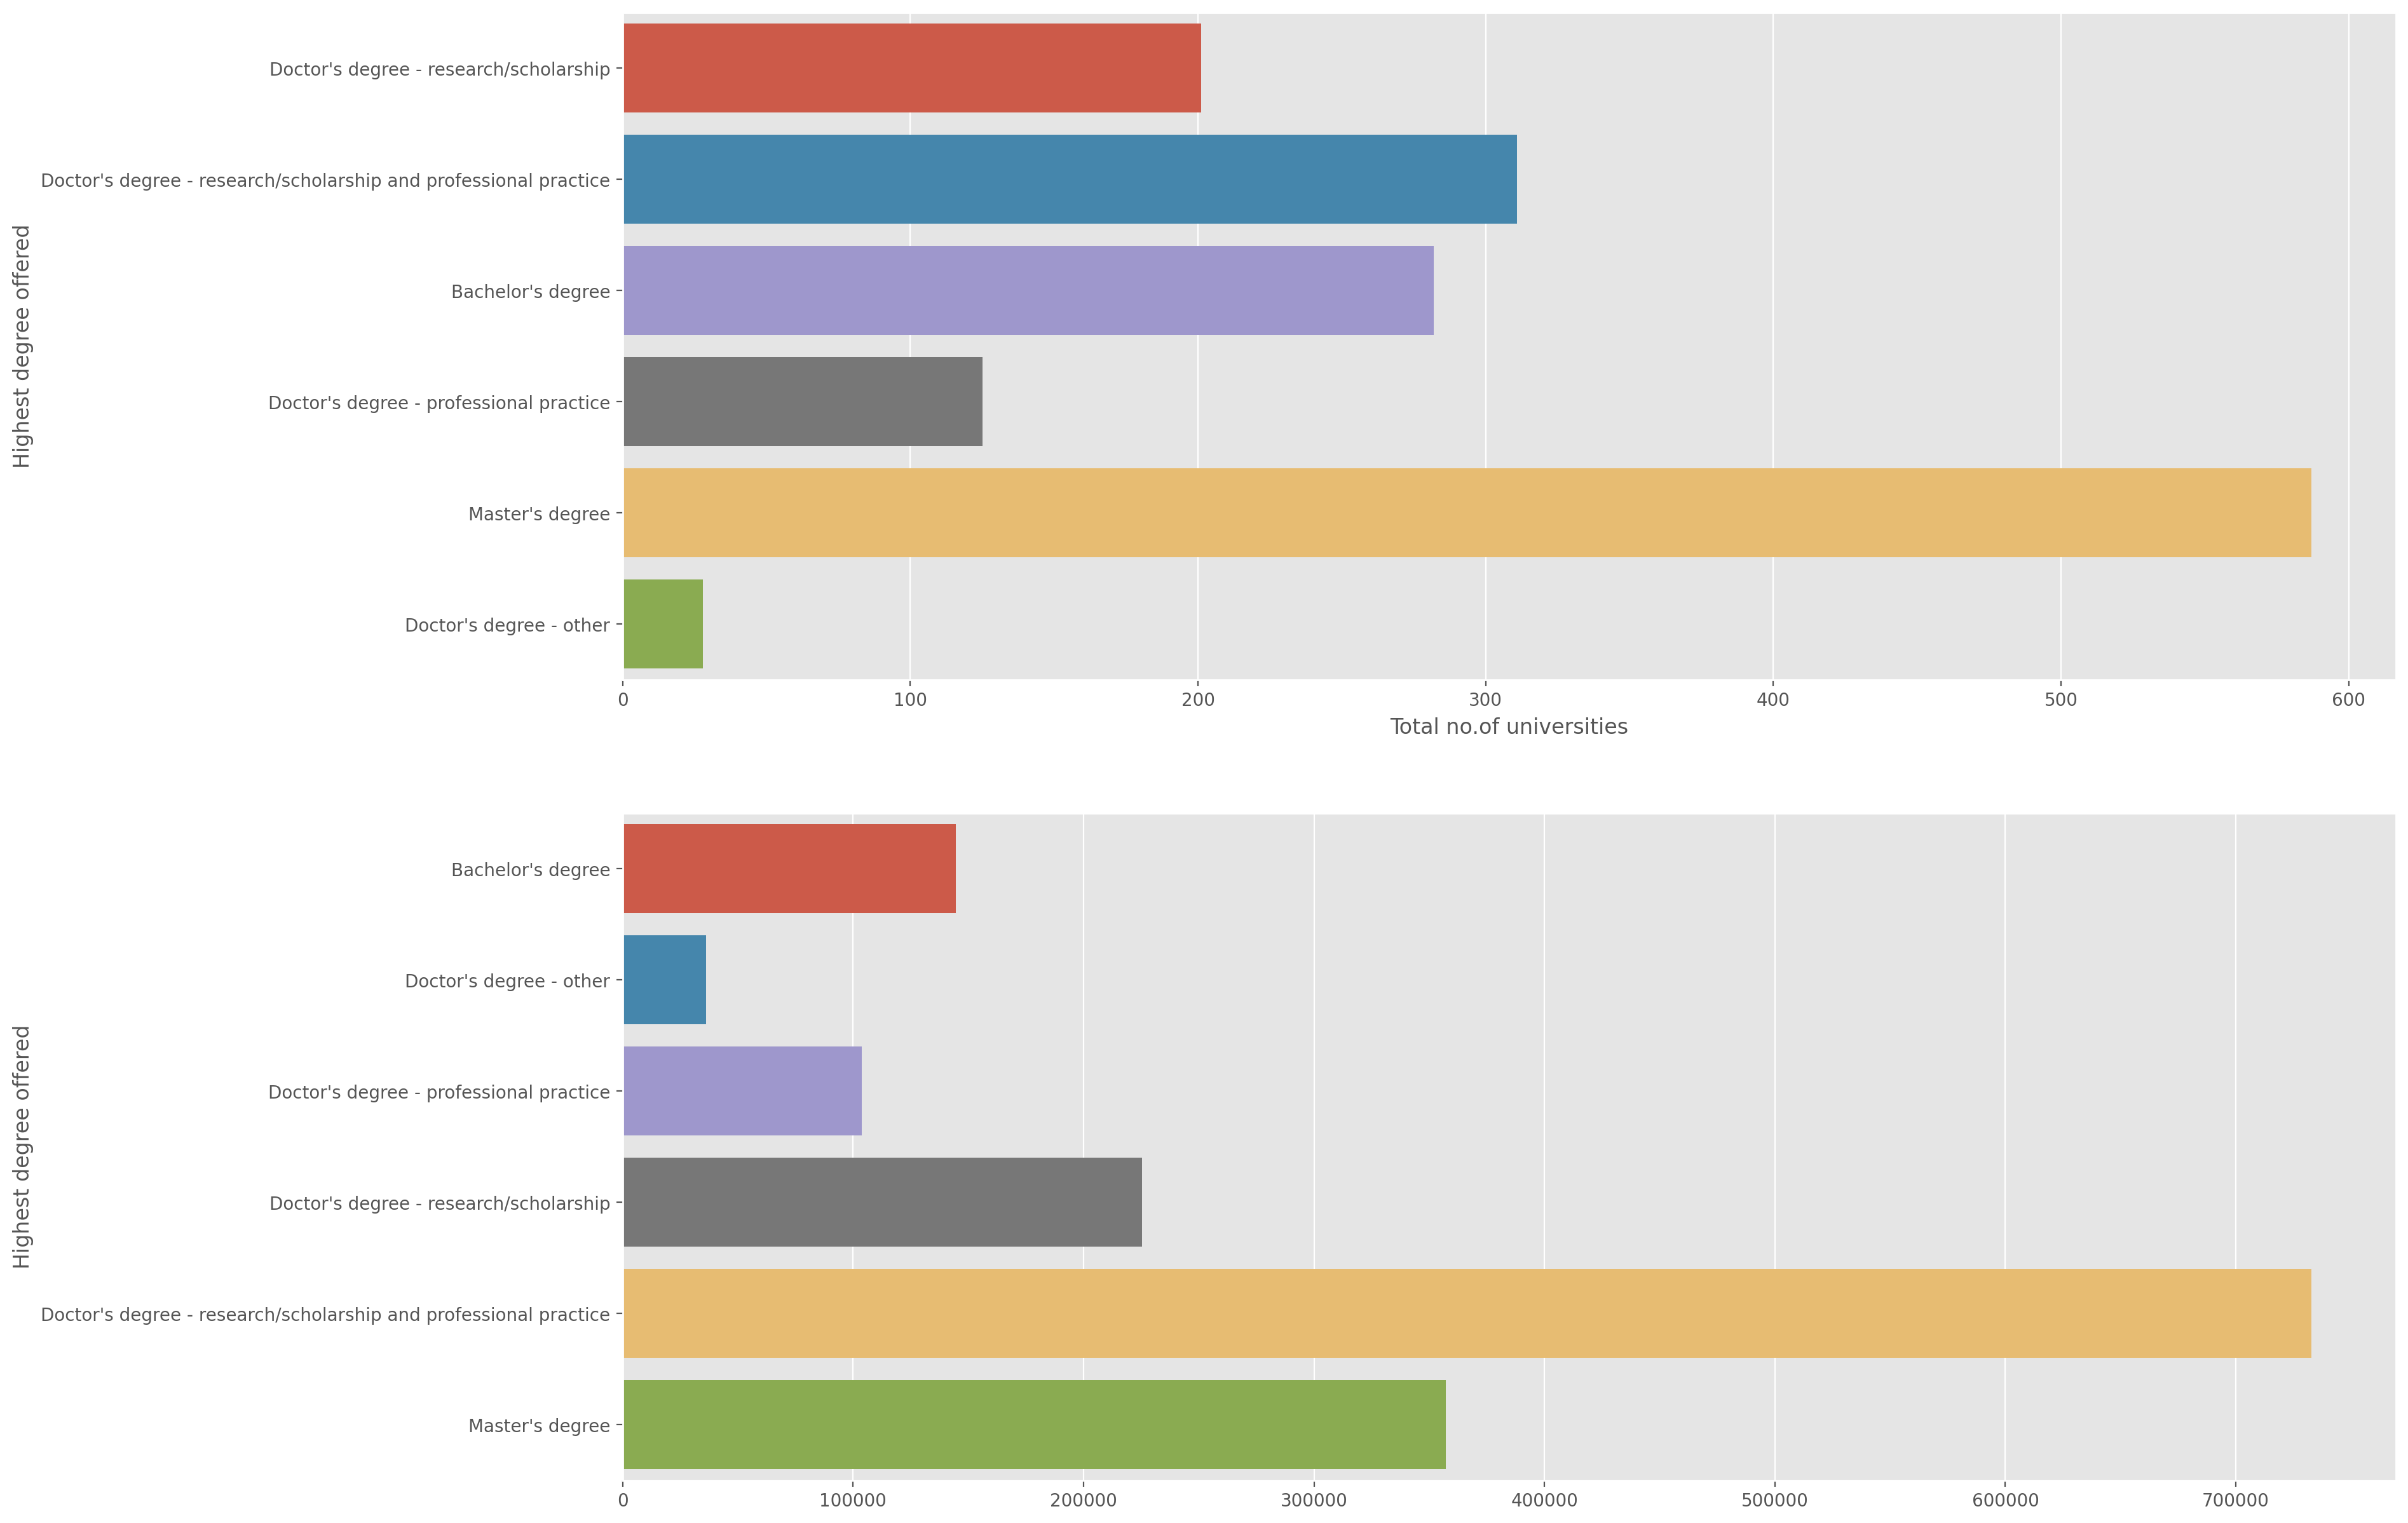

In [365]:
plt.figure(figsize=(18,15),dpi=200)
plt.subplot(2,1,1)
sns.countplot(y=higher_stud["Highest degree offered"])
plt.xlabel("Total no.of universities")

plt.subplot(2,1,2)
sns.barplot(high_enroll.values,high_enroll.index)

In [366]:
total=higher_stud["Enrolled total"].sum()
print("Total no.of students enrolled in the year 2013-2014 : ",total)

Total no.of students enrolled in the year 2013-2014 :  1600026.0


In [367]:
enroll_highuni=higher_stud[higher_stud["Highest degree offered"]!="Bachelor's degree"]["Enrolled total"].sum()
print("Total number of students enrolled in the universities which provides higher degree : ",enroll_highuni)

Total number of students enrolled in the universities which provides higher degree :  1455538.0


In [368]:
percent=(enroll_highuni/total)*100
print("The percentage of students enrolled in universities offering higher degree",percent)

The percentage of students enrolled in universities offering higher degree 90.96964674324042


In [369]:
a=higher_stud["Highest degree offered"].value_counts()
a

Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Bachelor's degree                                                   282
Doctor's degree - research/scholarship                              201
Doctor's degree - professional practice                             125
Doctor's degree - other                                              28
Name: Highest degree offered, dtype: int64

In [370]:
print("Total no.of universities : ",a.sum())

Total no.of universities :  1534


In [371]:
b=higher_stud[higher_stud["Highest degree offered"]!="Bachelor's degree"]["Highest degree offered"].value_counts()
b

Master's degree                                                     587
Doctor's degree - research/scholarship and professional practice    311
Doctor's degree - research/scholarship                              201
Doctor's degree - professional practice                             125
Doctor's degree - other                                              28
Name: Highest degree offered, dtype: int64

In [372]:
print("Total no.of universities that provides higher degree : ",b.sum())

Total no.of universities that provides higher degree :  1252


In [373]:
print("Percentage of university which provides higher degree : ",(b.sum()/a.sum())*100)

Percentage of university which provides higher degree :  81.61668839634942


## ----------------------------------------------------------------------------------------------------------------------------------
- 90.96 % of total students chose universities that provides a higher degree than bachelors degree
- Around 82% of the universities in America provides a higher degree

## ============================================================================
## Conclusion

- By seeing the number of applications received by a university we cannot say that it is the most preferred ones by the students.The university which has received the highest application had only a enrollment rate of 7.7%.

- Universities which has selected less than 25% of students from total applicants have more percentage of students enrolled with them than the universities which had admitted more than the 95% of the total applicants.So the students doesnt choose the universities based on its rate of admission.

- The students preferred to study in Public universities than the Private universities eventhough there are more no.of private universities than the public ones.

-  more than 70% of the students who had enrolled in the year 2013 has selected the universities which has less than the average tution fees. Its also noticed that the higher the fees the lesser the no.of students enrolled in that particular university.

- Almost all the universities which comes under the Public sector has less than the average fees and only 22% of universities under Private sector has less than the average fees.

- Most of the in-state students who chose to live on campus has choose the universities which has less than average accomodation cost and the cost of accomodation doesnt had much impact on the out-of-state students beacuse 50% of among them choose universities which had more than average accomodation cost and 50% less expensive ones.

- In 2013-2014 academic year most students applied and enrolled in the universities which belongs to the states having high GDP.

- Around 82% of the universities in America provides a higher degree and around 91% of enrolled students in the year 2013-2014 chose universities that provides a higher degree.

